# Euler method for solving second-order differential equations

Similar to the first-order Euler method, the second-order differential equations can also solved using the Euler method.

Previously we got,
$$f(x_n) \approx f(x_{n-1}) + h \cdot f'(x_{n-1})$$

Replacing $f(x_n)$ with its derivative,
$$f'(x_n) \approx f'(x_{n-1}) + h \cdot f''(x_{n-1})$$

Putting this equation into the previous one,
$$f(x_n) \approx f(x_{n-1}) + h \left[ f'(x_{n-1}) + h \cdot f''(x_{n-1}) \right]$$
$$f(x_n) \approx f(x_{n-1}) + h \cdot f'(x_{n-1}) + h^2 \cdot f''(x_{n-1})$$

Again we can also reach here from the Taylor expansion, but this time we have to consider upto the third term,
$$f(x_n) \approx f(x_{n-1}) + h \cdot f'(x_{n-1}) + h^2 \cdot f''(x_{n-1})$$

But while writing the code we will first eveluate the first derivaitve using the euler method and then again use the first derivetive to evalute the function itsef.
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$
$$f'(x_n) = f'(x_{n-1}) + h \cdot f''(x_{n-1})$$

For this we would not only have to provide the initial value of $f(x)$, but also the intial value of $f'(x)$ both at $x= x_0$, which will be starting point for the Euler algorithm when solving for $f(x)$ and $f'(x)$ respectively. This would also eliminate the two constants we would have got from solving the second-order differential equations. 

## Code

In [1]:
from numpy import cos, deg2rad, empty, exp, pi, sin
from scipy.constants import g
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly spaced points between limits `a` and `b`
def generate_points(a, b, h):

    # Calculating the number of points
    n = int(((b - a) / h) + 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    return points


In [3]:
# Code for solving second-order ordinary differential equations using Euler method
def solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h):

    # Generating equispaced points
    x = generate_points(x_i, x_f, h)

    # Creating two arrays to store `y_prime` and `y`
    y_prime = empty(x.size)
    y = empty(x.size)

    # Initialising `y_prime` and `y` with initial values
    y_prime[0] = y_prime_i
    y[0] = y_i

    # Evaluating the function `y_prime` and `y` at the remaining points
    for i in range(1, x.size):
        y_prime[i] = y_prime[i-1] + h * \
            y_prime_prime(x[i], y[i-1], y_prime[i-1])
        y[i] = y[i-1] + h * y_prime[i-1]

    return x, y


## Examples

### $$\frac{d^2y}{dx^2} = y$$

In [4]:
def y_prime_prime(x, y, y_prime):
    return y


x_i = 0
x_f = 5
h = 0.1

y_i = 1
y_prime_i = 1


In [5]:
# Euler approximation
points, y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

# Trial solution
y_trial = exp(points) - 1


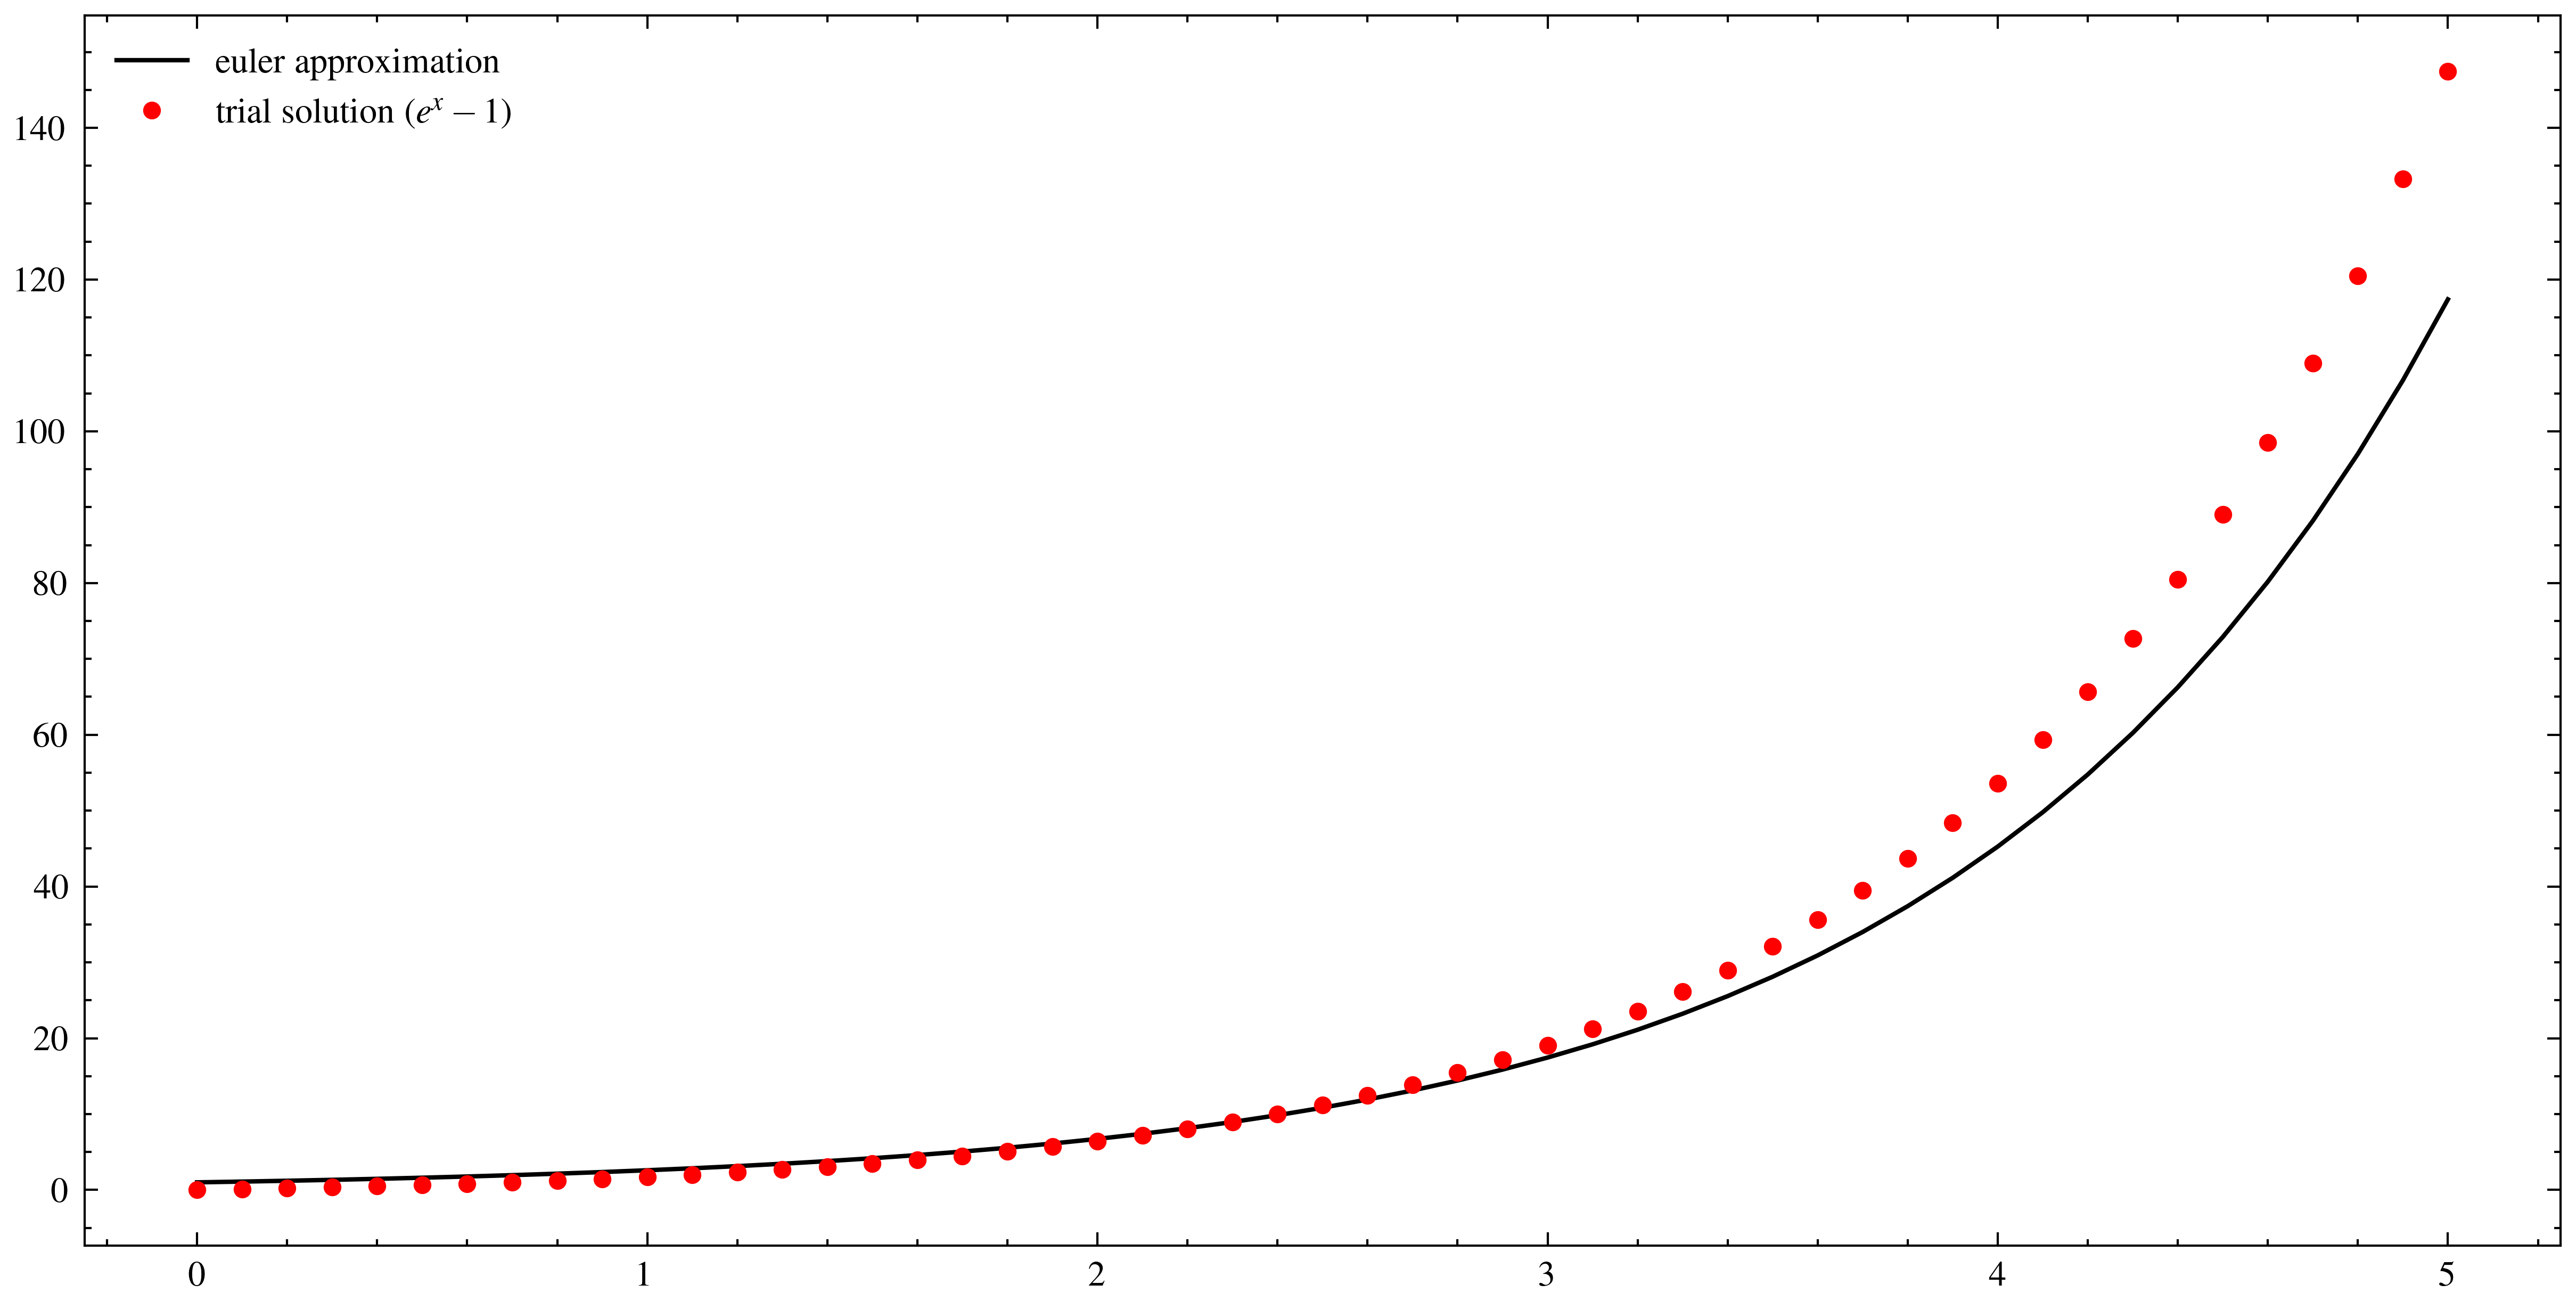

In [6]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_trial, '.', label="trial solution ($e^x - 1$)")
plt.legend()
plt.show()


### $$\frac{d^2y}{dx^2} = -y$$

In [7]:
def y_prime_prime(x, y, y_prime):
    return -y


x_i = 0
x_f = 2 * pi
h = 0.1

y_i = 0
y_prime_i = 1


In [8]:
# Euler approximation
points, y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

# Trial solution
y_trial = sin(points)


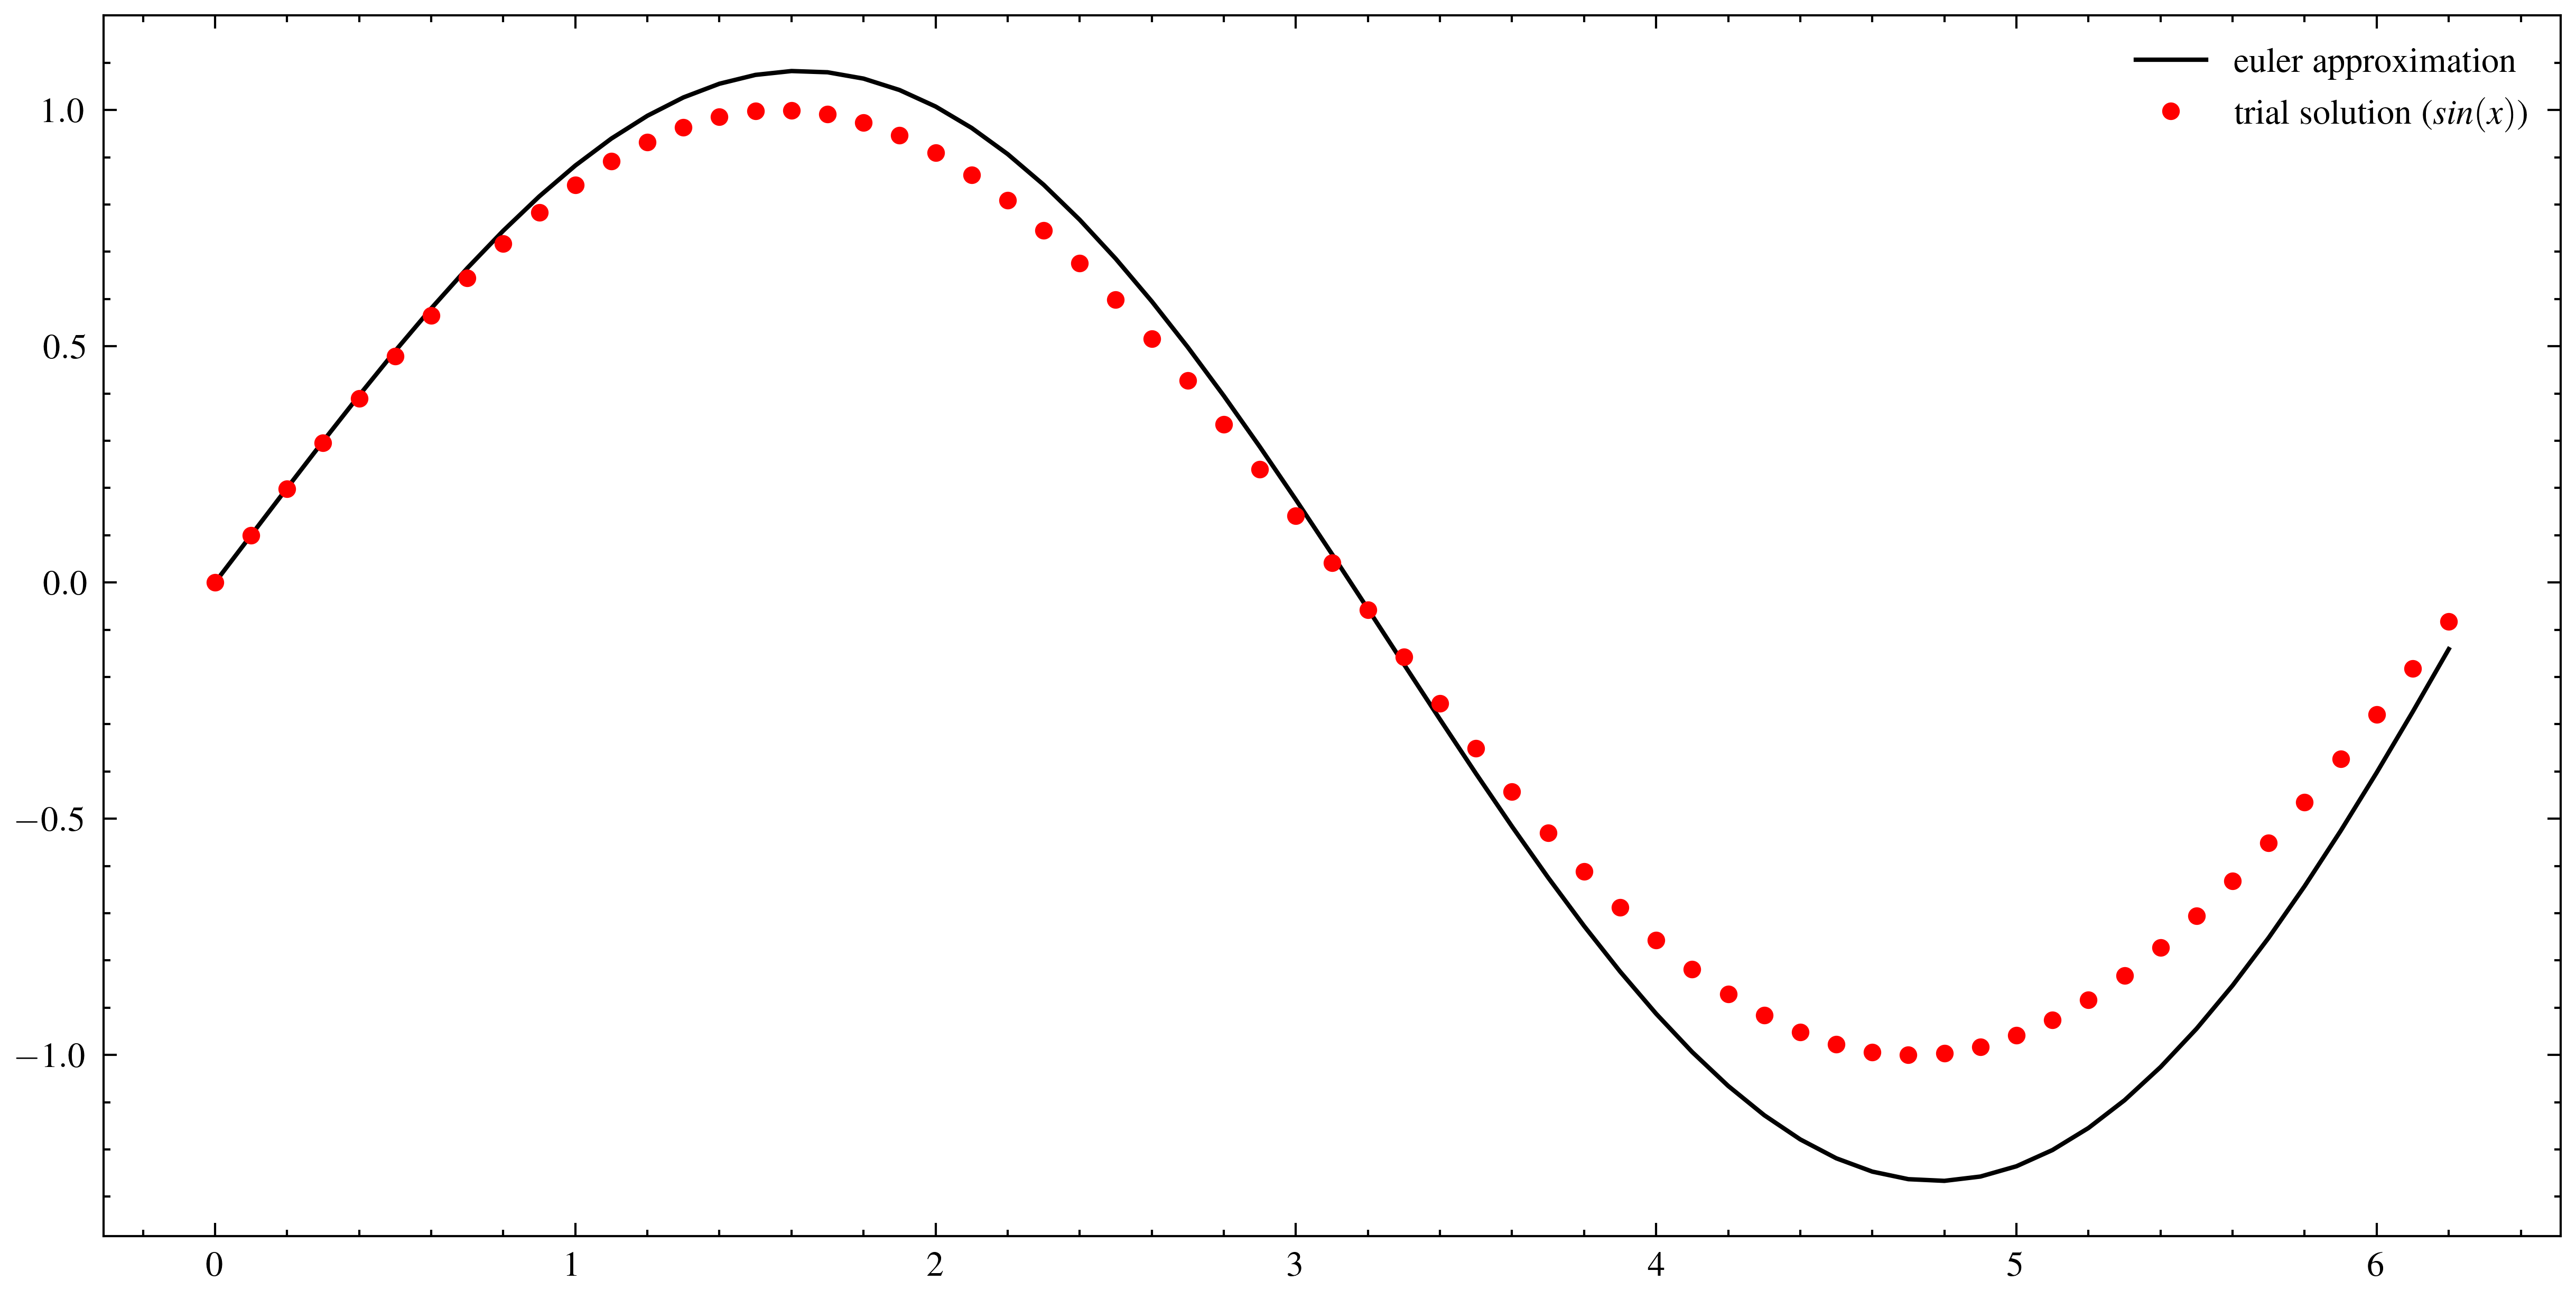

In [9]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_trial, '.', label="trial solution ($sin(x)$)")
plt.legend()
plt.show()


## Real world physics problems

### Harmonic oscillator

The equation of motion for an ideal harmonic oscillator is,
$$m \frac{d^2x}{dt^2} = -kx$$
$$m \ddot x = -kx$$

In presence of the force of friction proprtional to the velocity ($\dot x$) of the harmonic oscillator the equation becomes,
$$m \ddot x = -kx - b \dot x$$

Which can further be expressed in the standard form,
$$\ddot x + 2 \gamma \dot x + \omega^2 x = 0$$

where, $\gamma = b/2m$ and $\omega^2 = k/m$.

#### Undamped harmonic oscillator

$$\gamma = 0$$

In [10]:
gamma = 0
omega = 2


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 0
y_prime_i = 1
h = 0.001


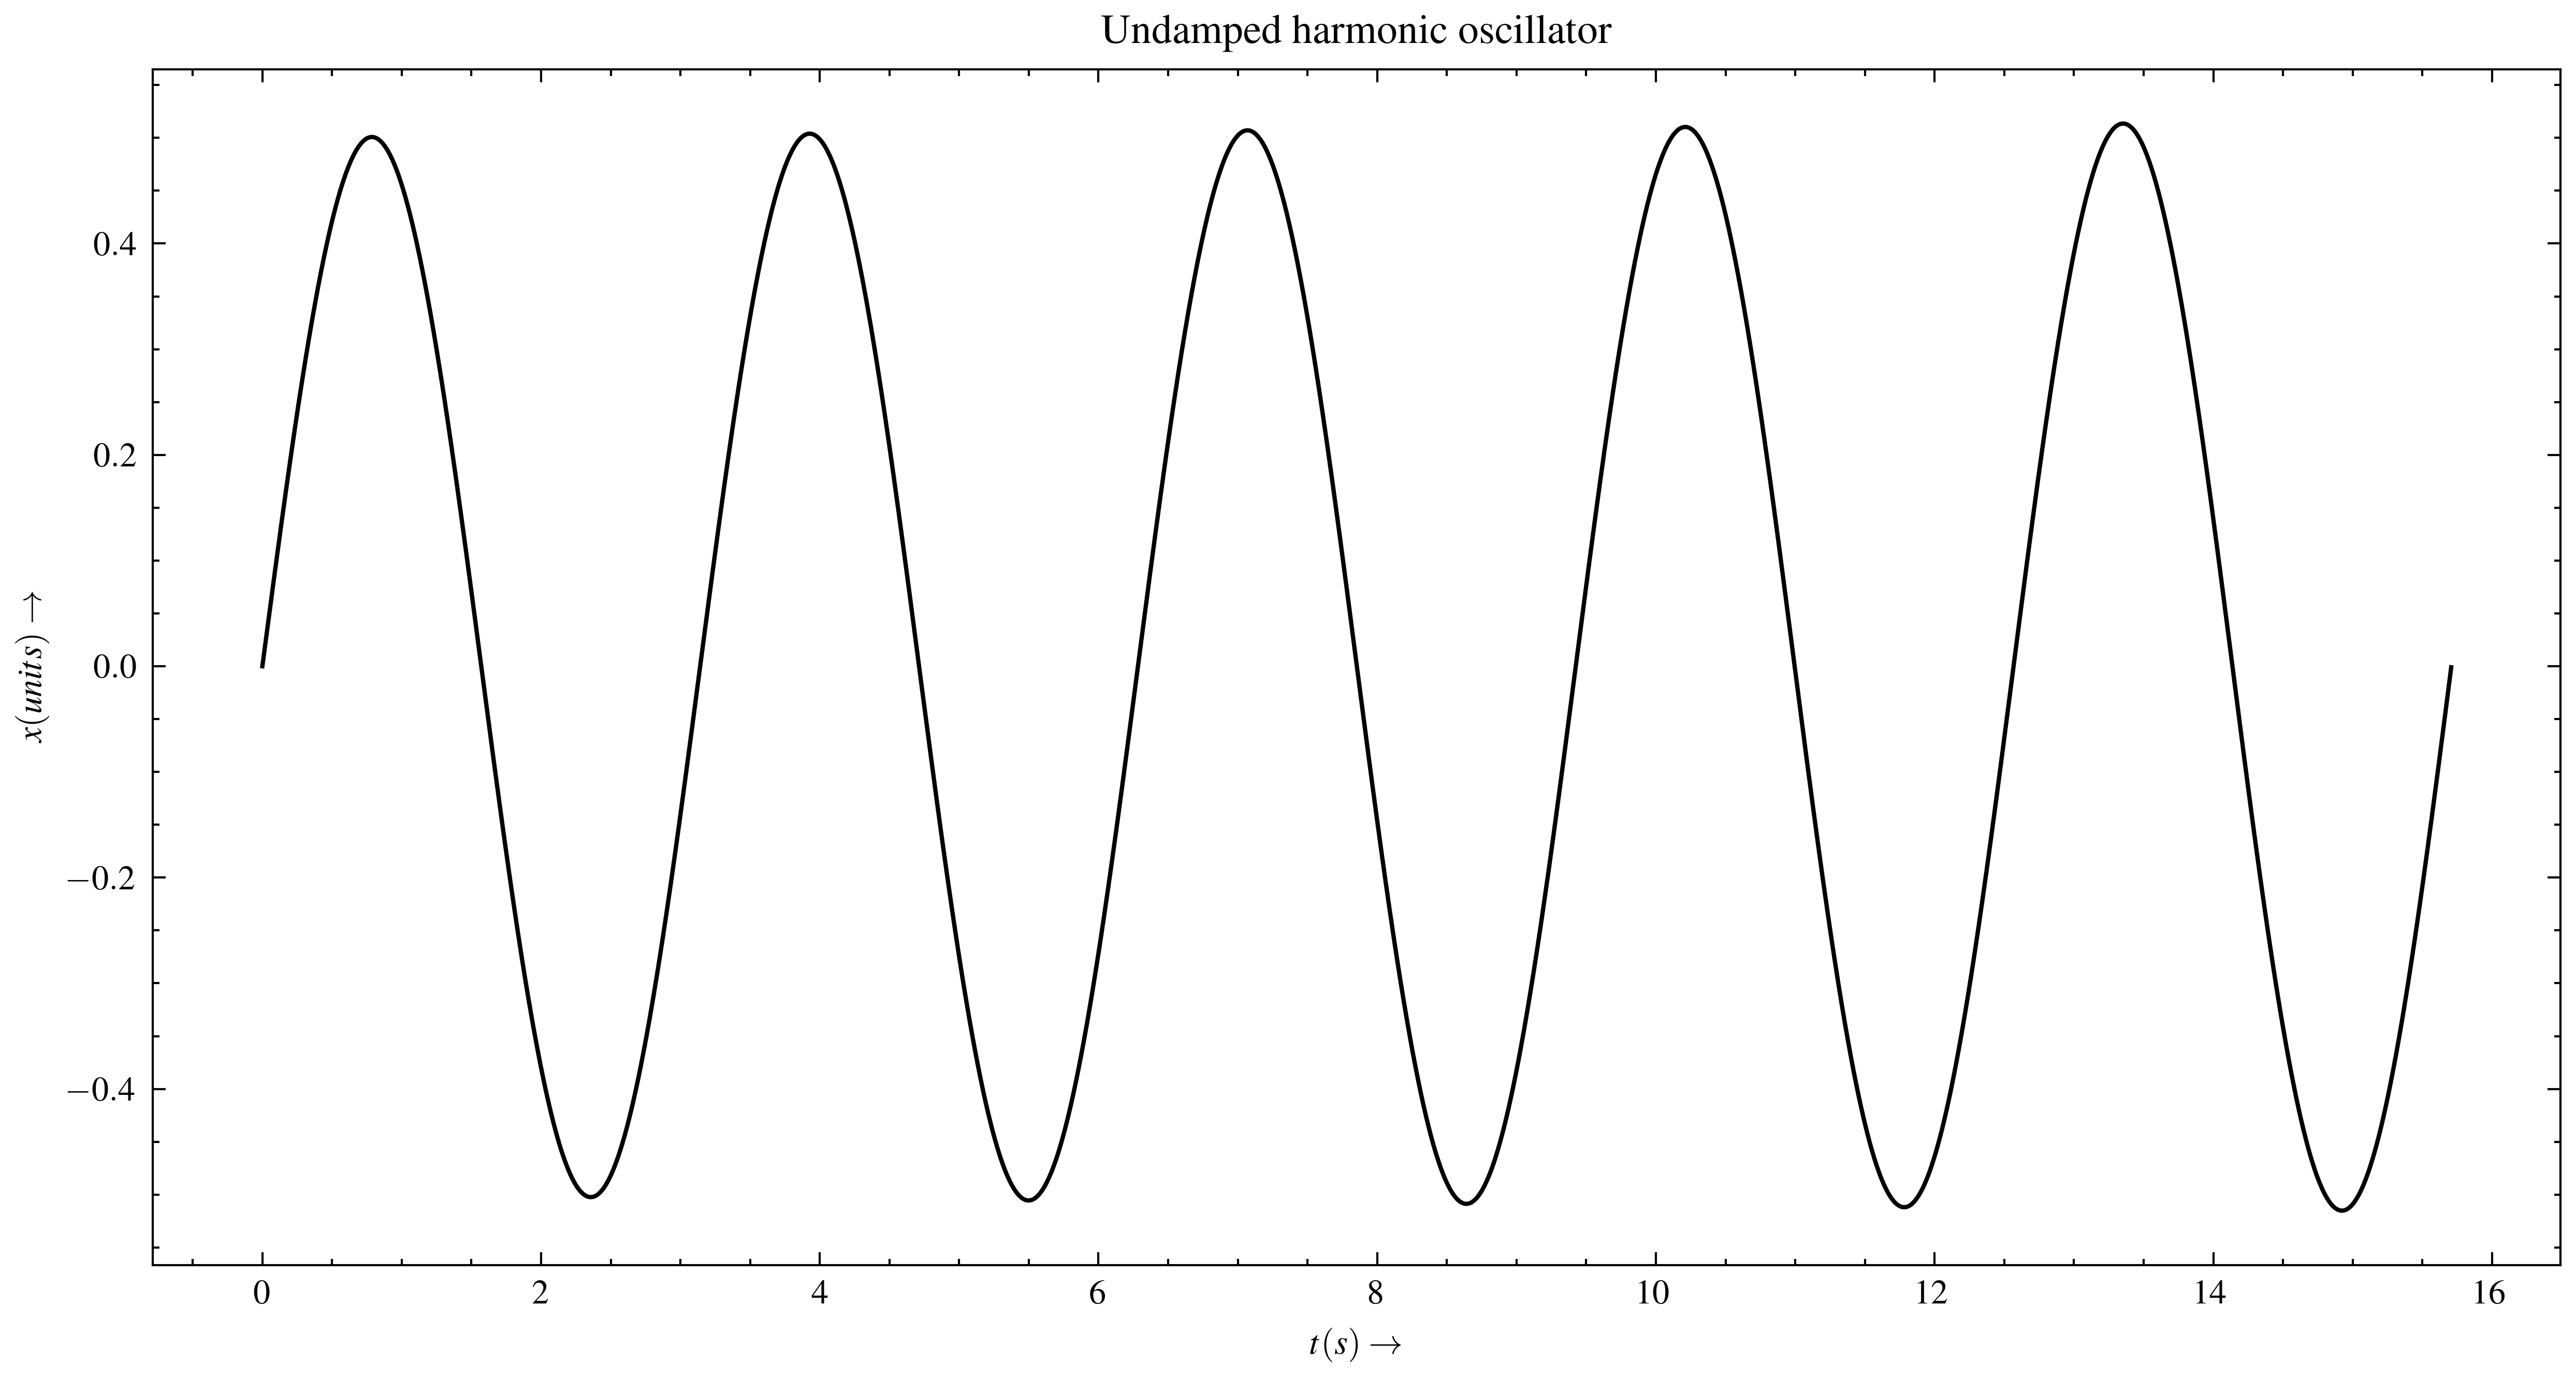

In [11]:
points, y_undamp = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

plt.plot(points, y_undamp)
plt.title("Undamped harmonic oscillator")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.show()


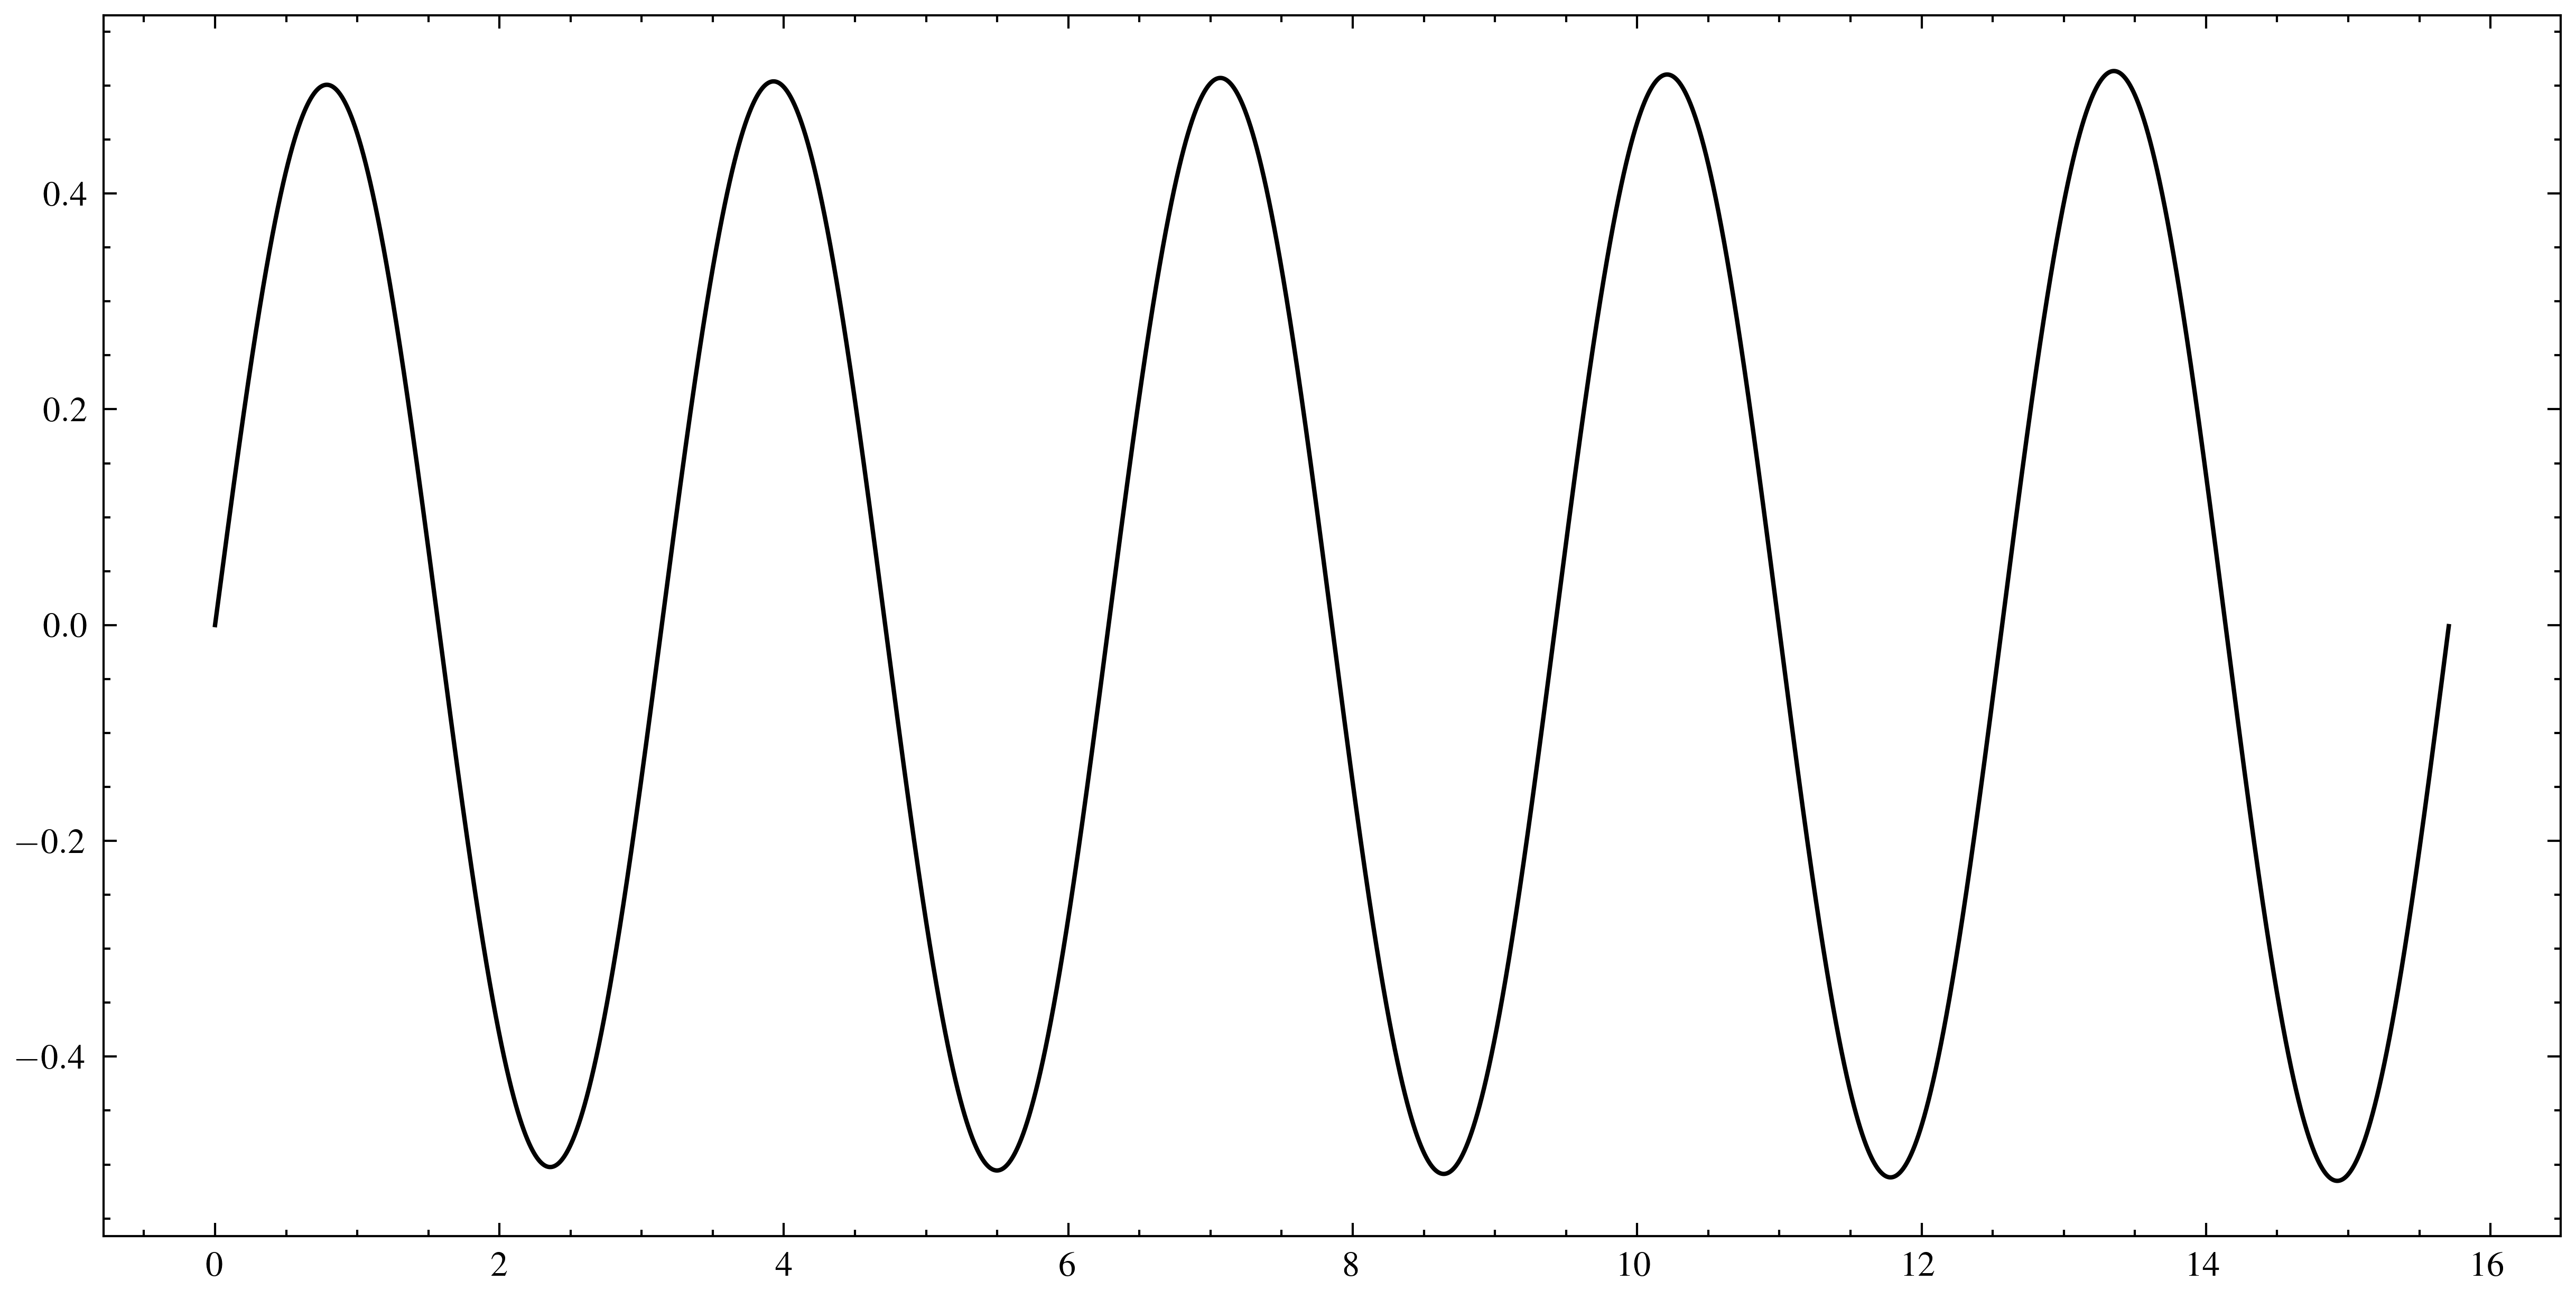

In [12]:
plt.plot(points, y_undamp)
plt.show()


#### Under-damped harmonic oscillator

$$\gamma^2 < \omega^2$$

In [13]:
gamma = 0.5
omega = 5


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 10
y_prime_i = 1
h = 0.001


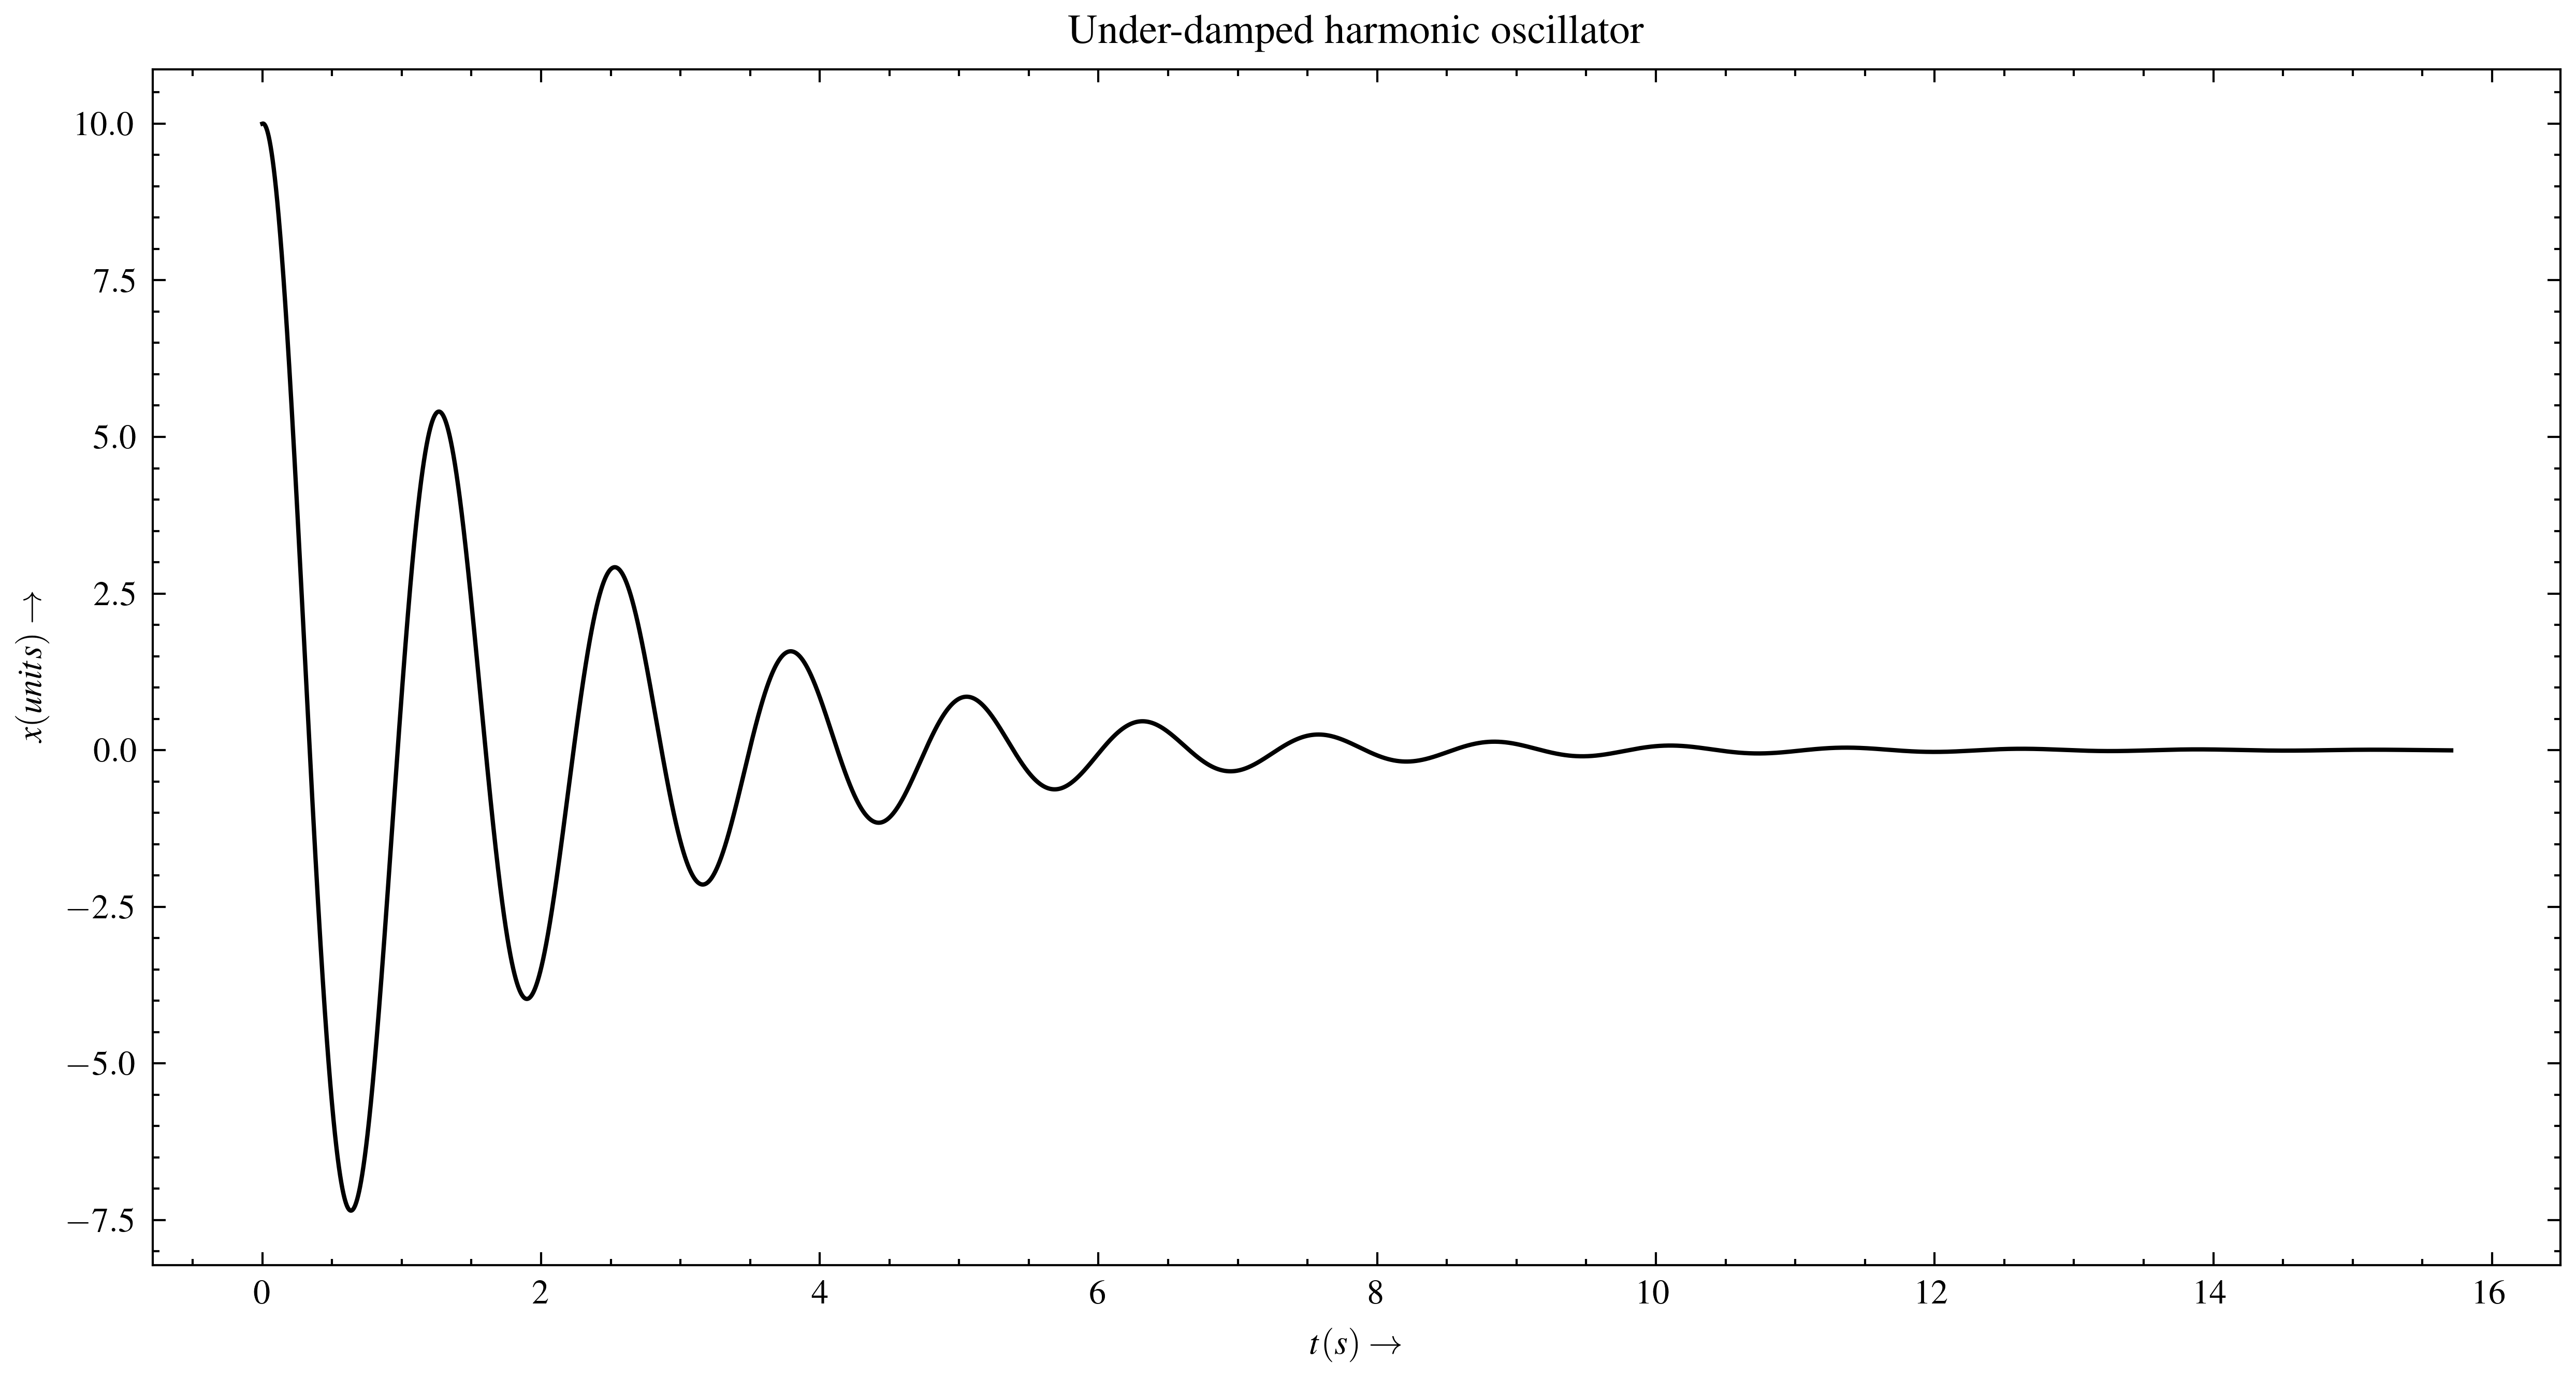

In [14]:
points, y_under = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

plt.plot(points, y_under)
plt.title("Under-damped harmonic oscillator")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.show()


#### Critically-damped harmonic oscillator

$$\gamma^2 = \omega^2$$

In [15]:
gamma = 2
omega = 2


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 10
y_prime_i = 1
h = 0.001


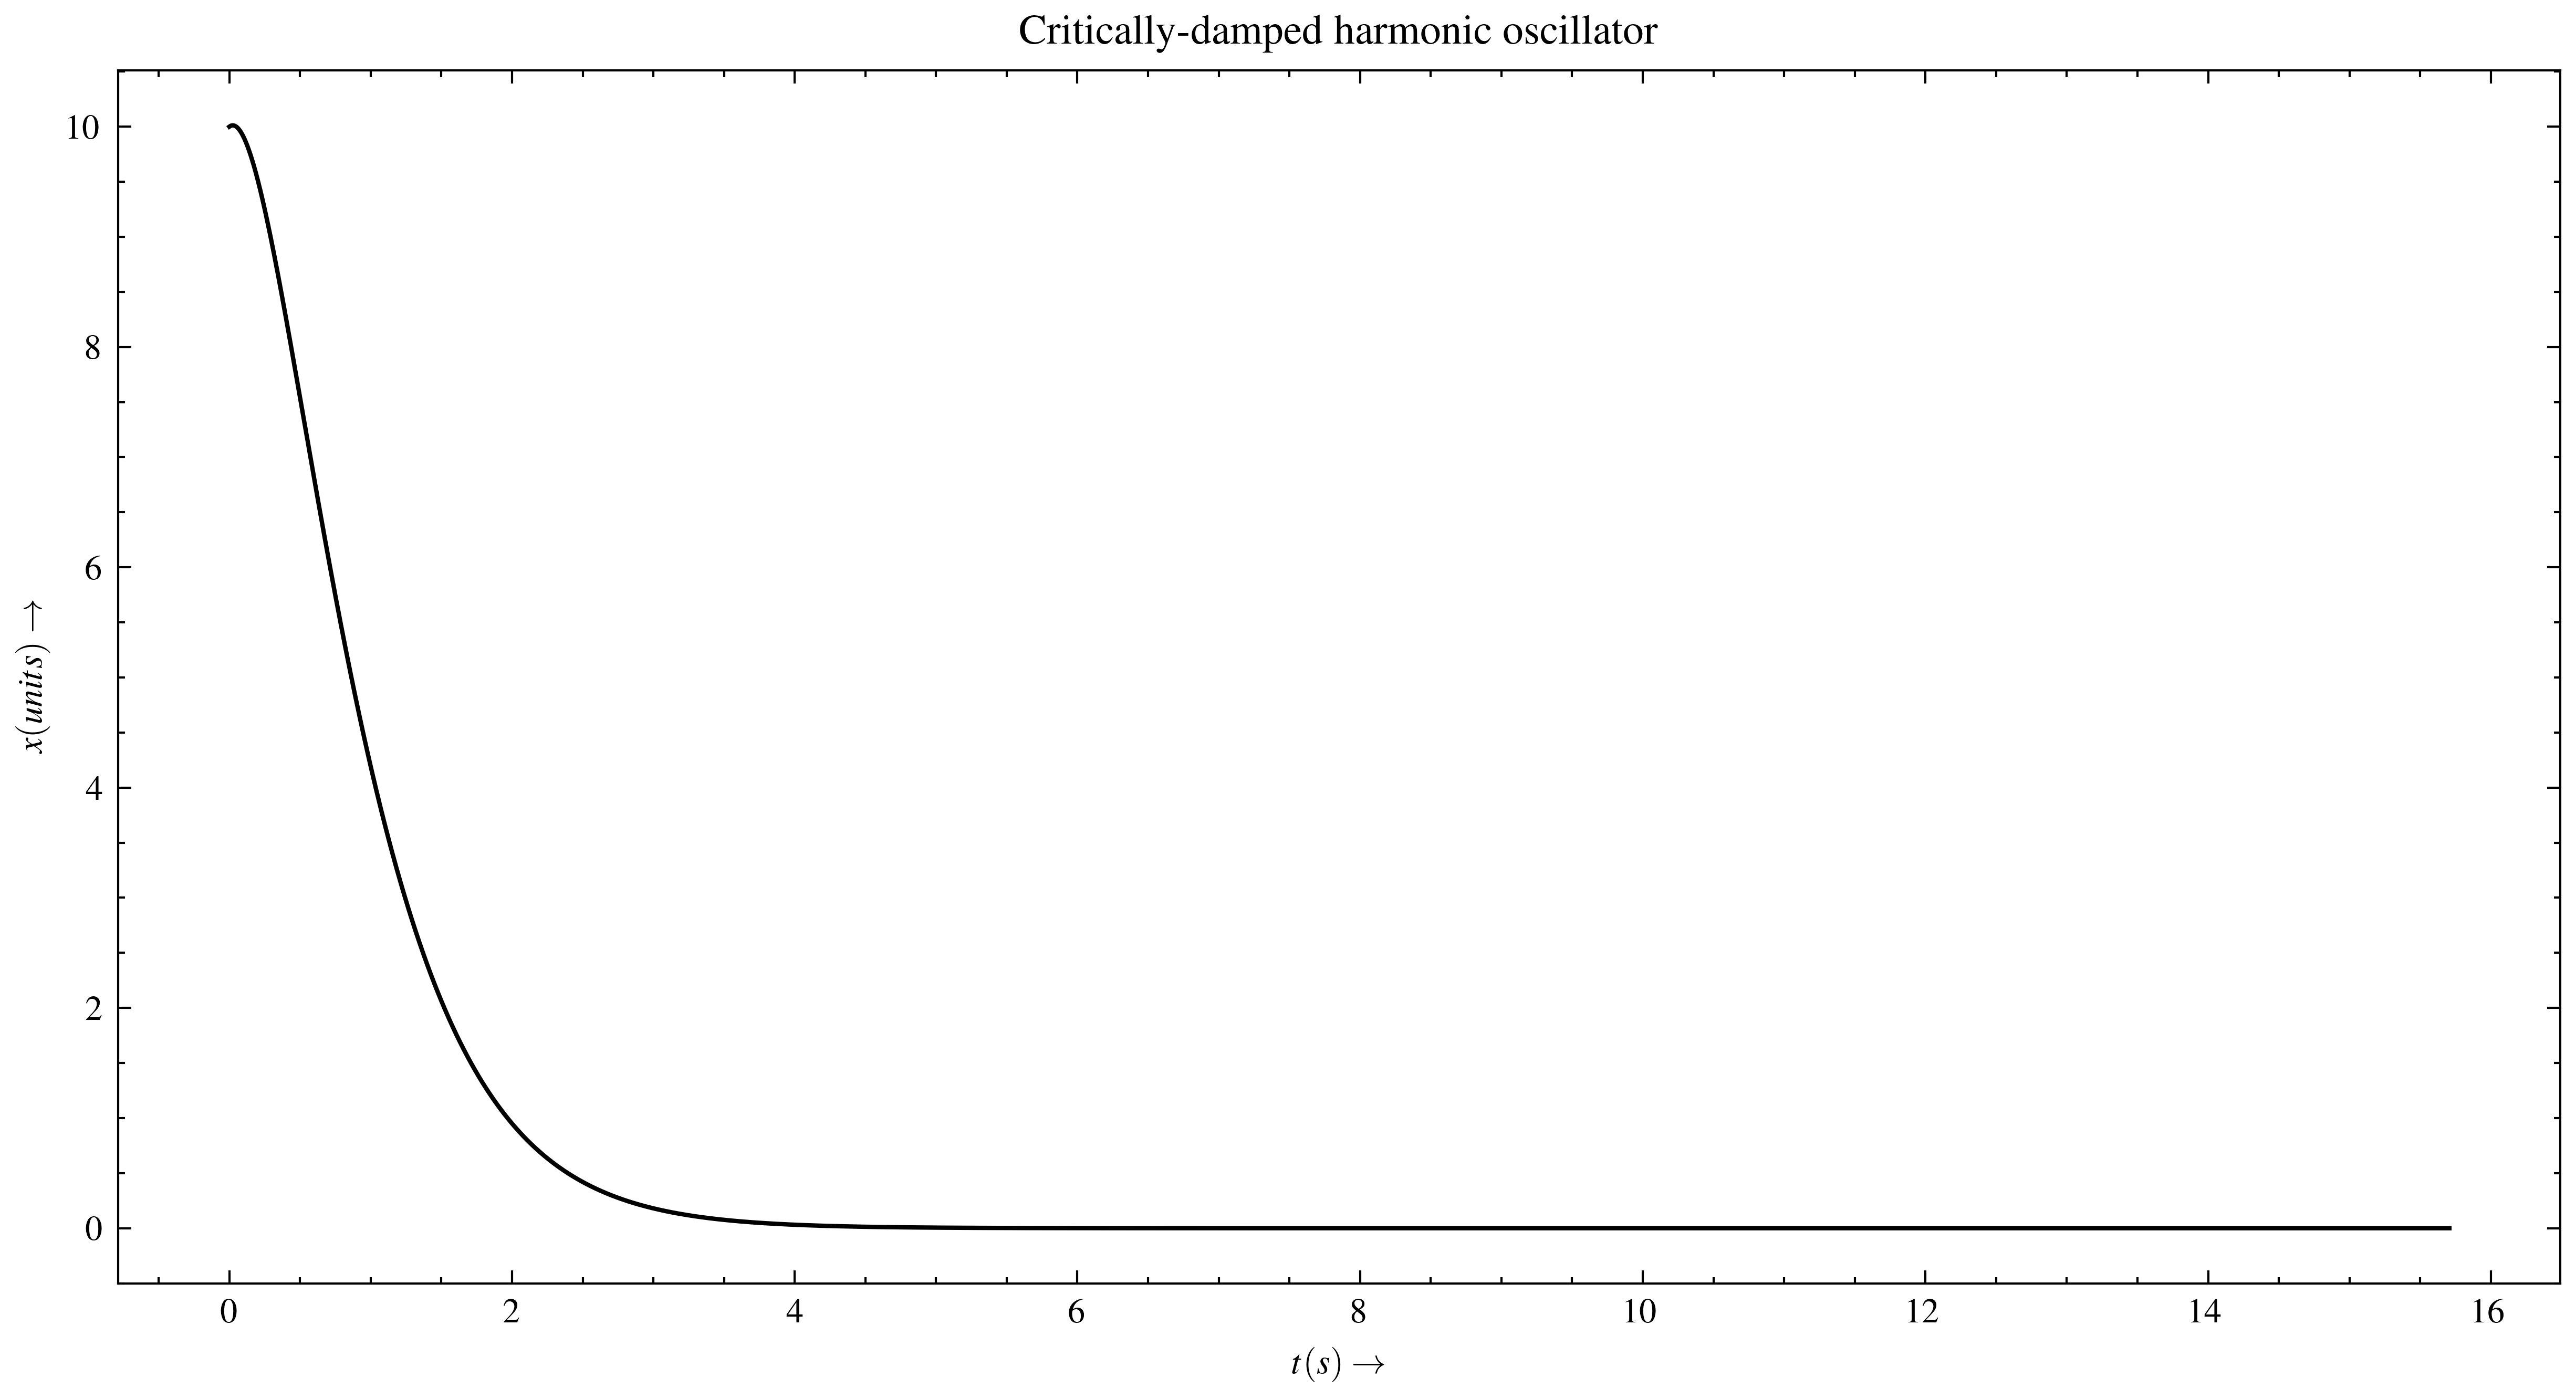

In [16]:
points, y_critical = solve_euler(
    y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

plt.plot(points, y_critical)
plt.title("Critically-damped harmonic oscillator")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.show()


#### Over-damped harmonic oscillator

$$\gamma^2 > \omega^2$$

In [17]:
gamma = 3
omega = 1


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 10
y_prime_i = 1
h = 0.001


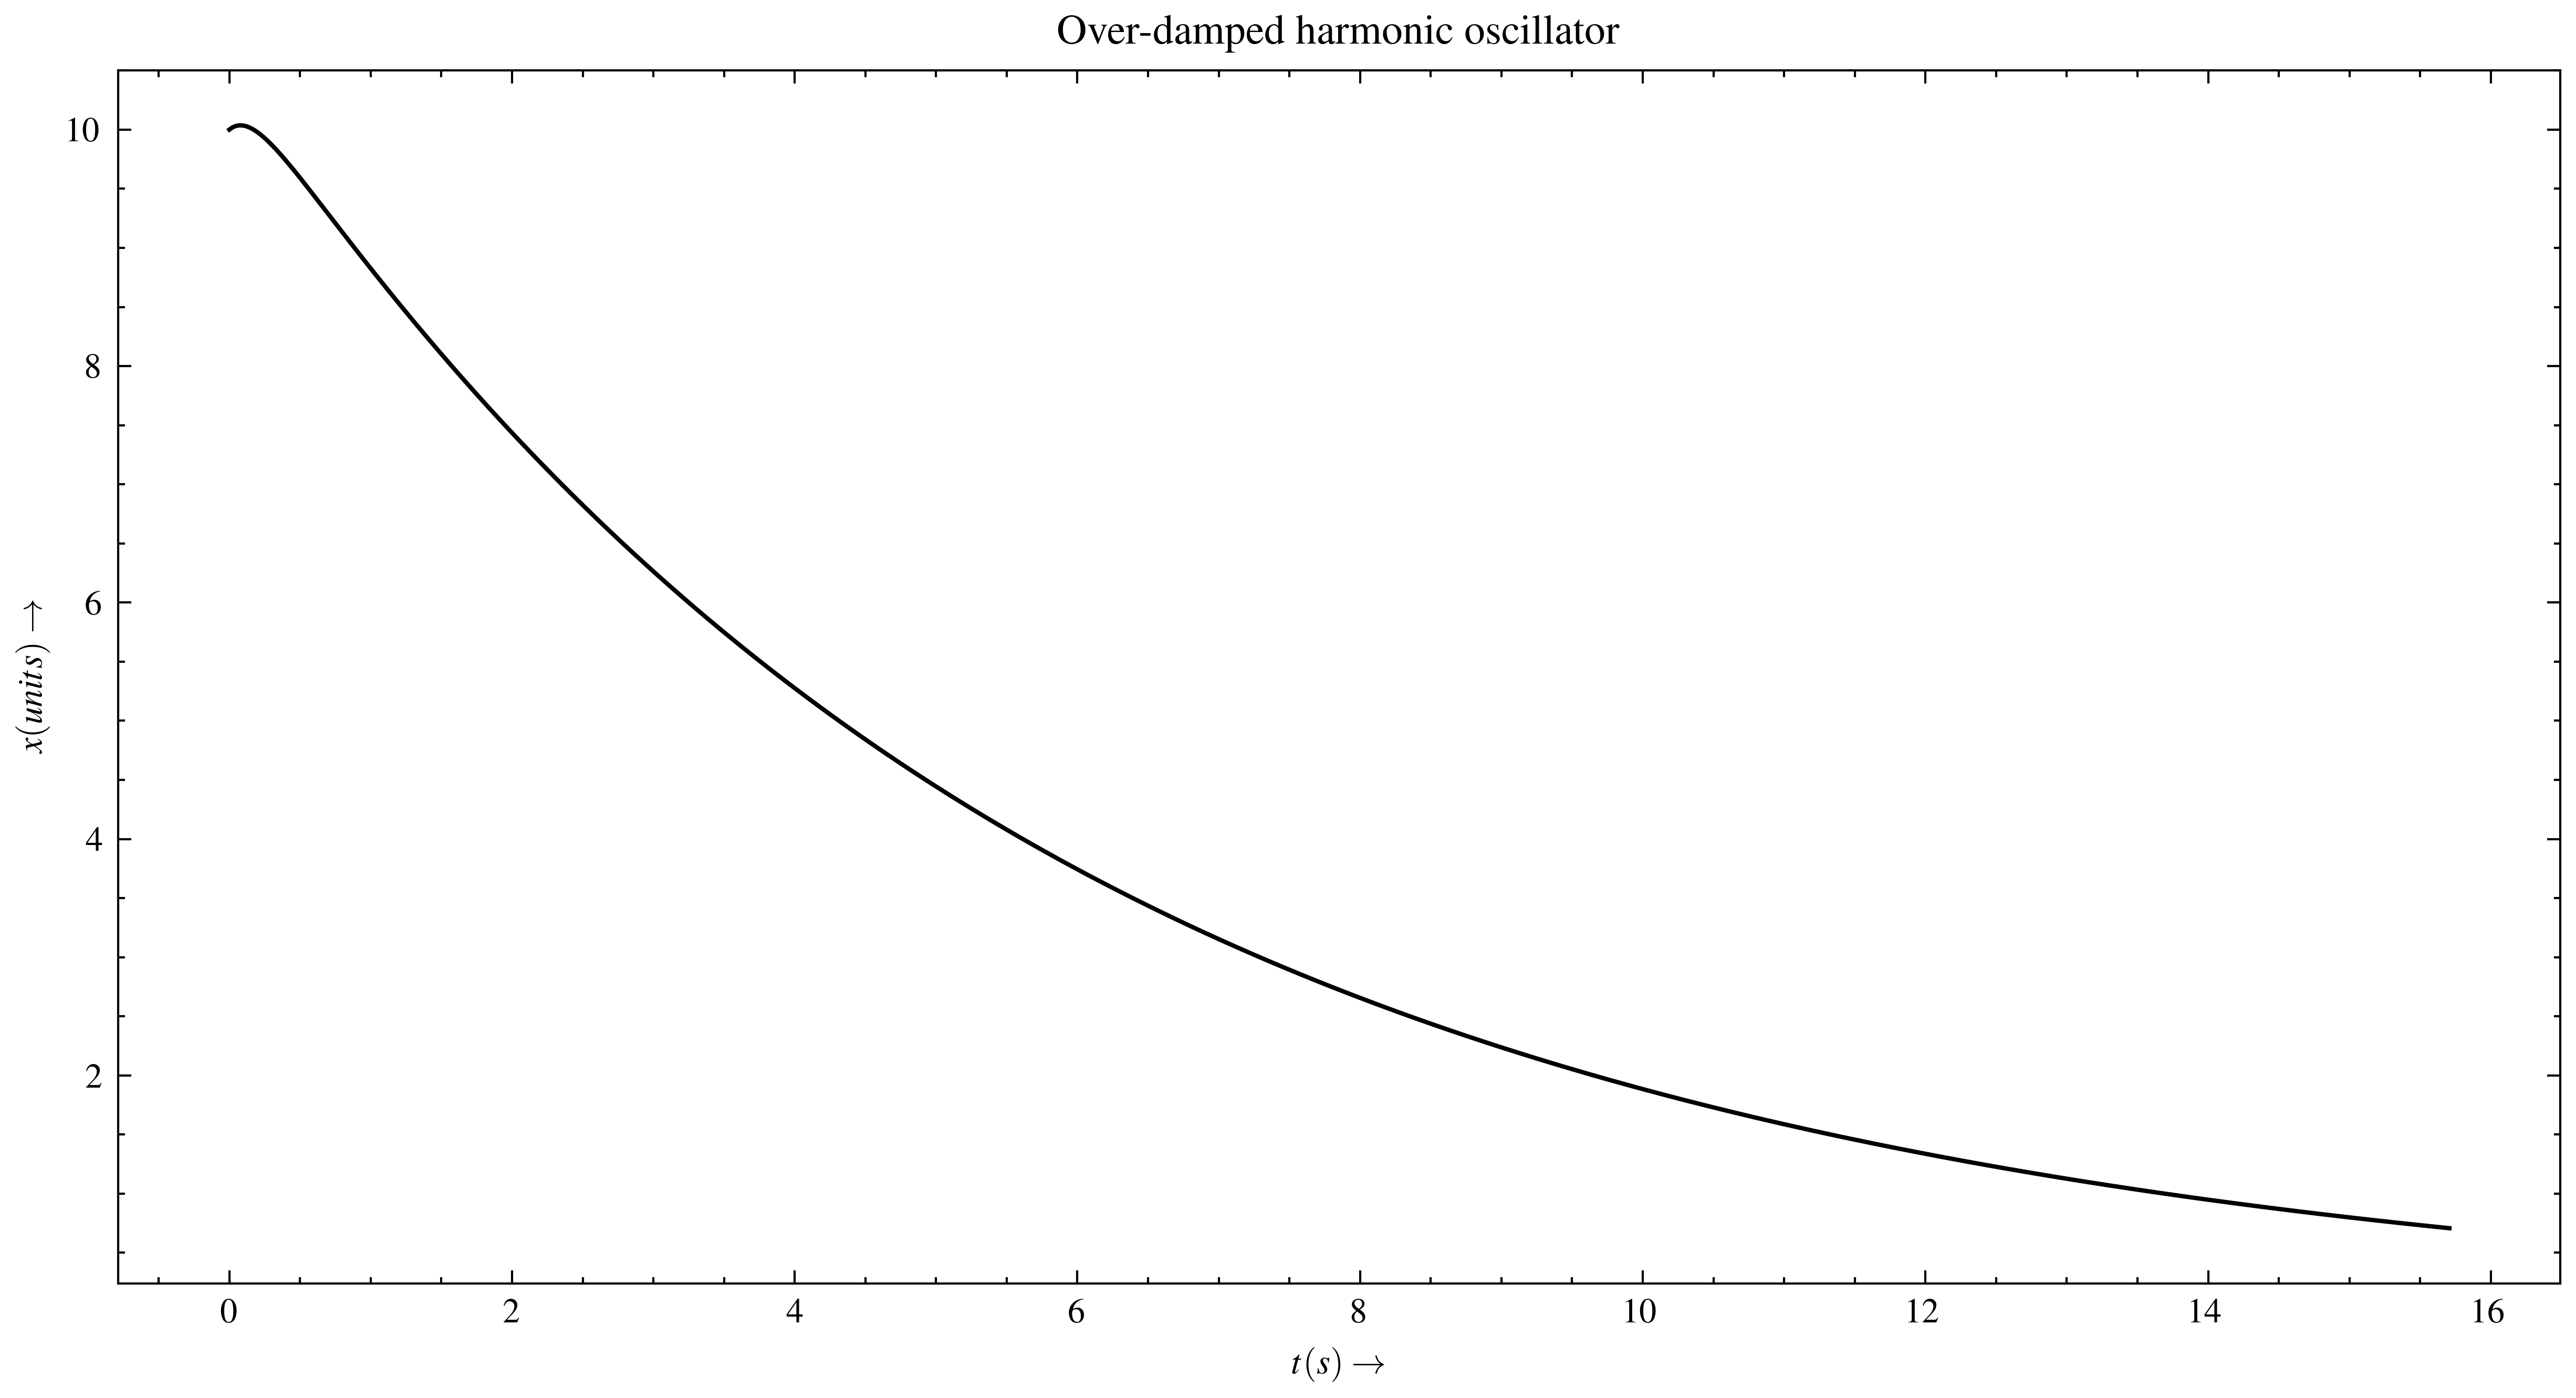

In [18]:
points, y_over = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

plt.plot(points, y_over)
plt.title("Over-damped harmonic oscillator")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.show()


### Comparing different types of damped oscillations

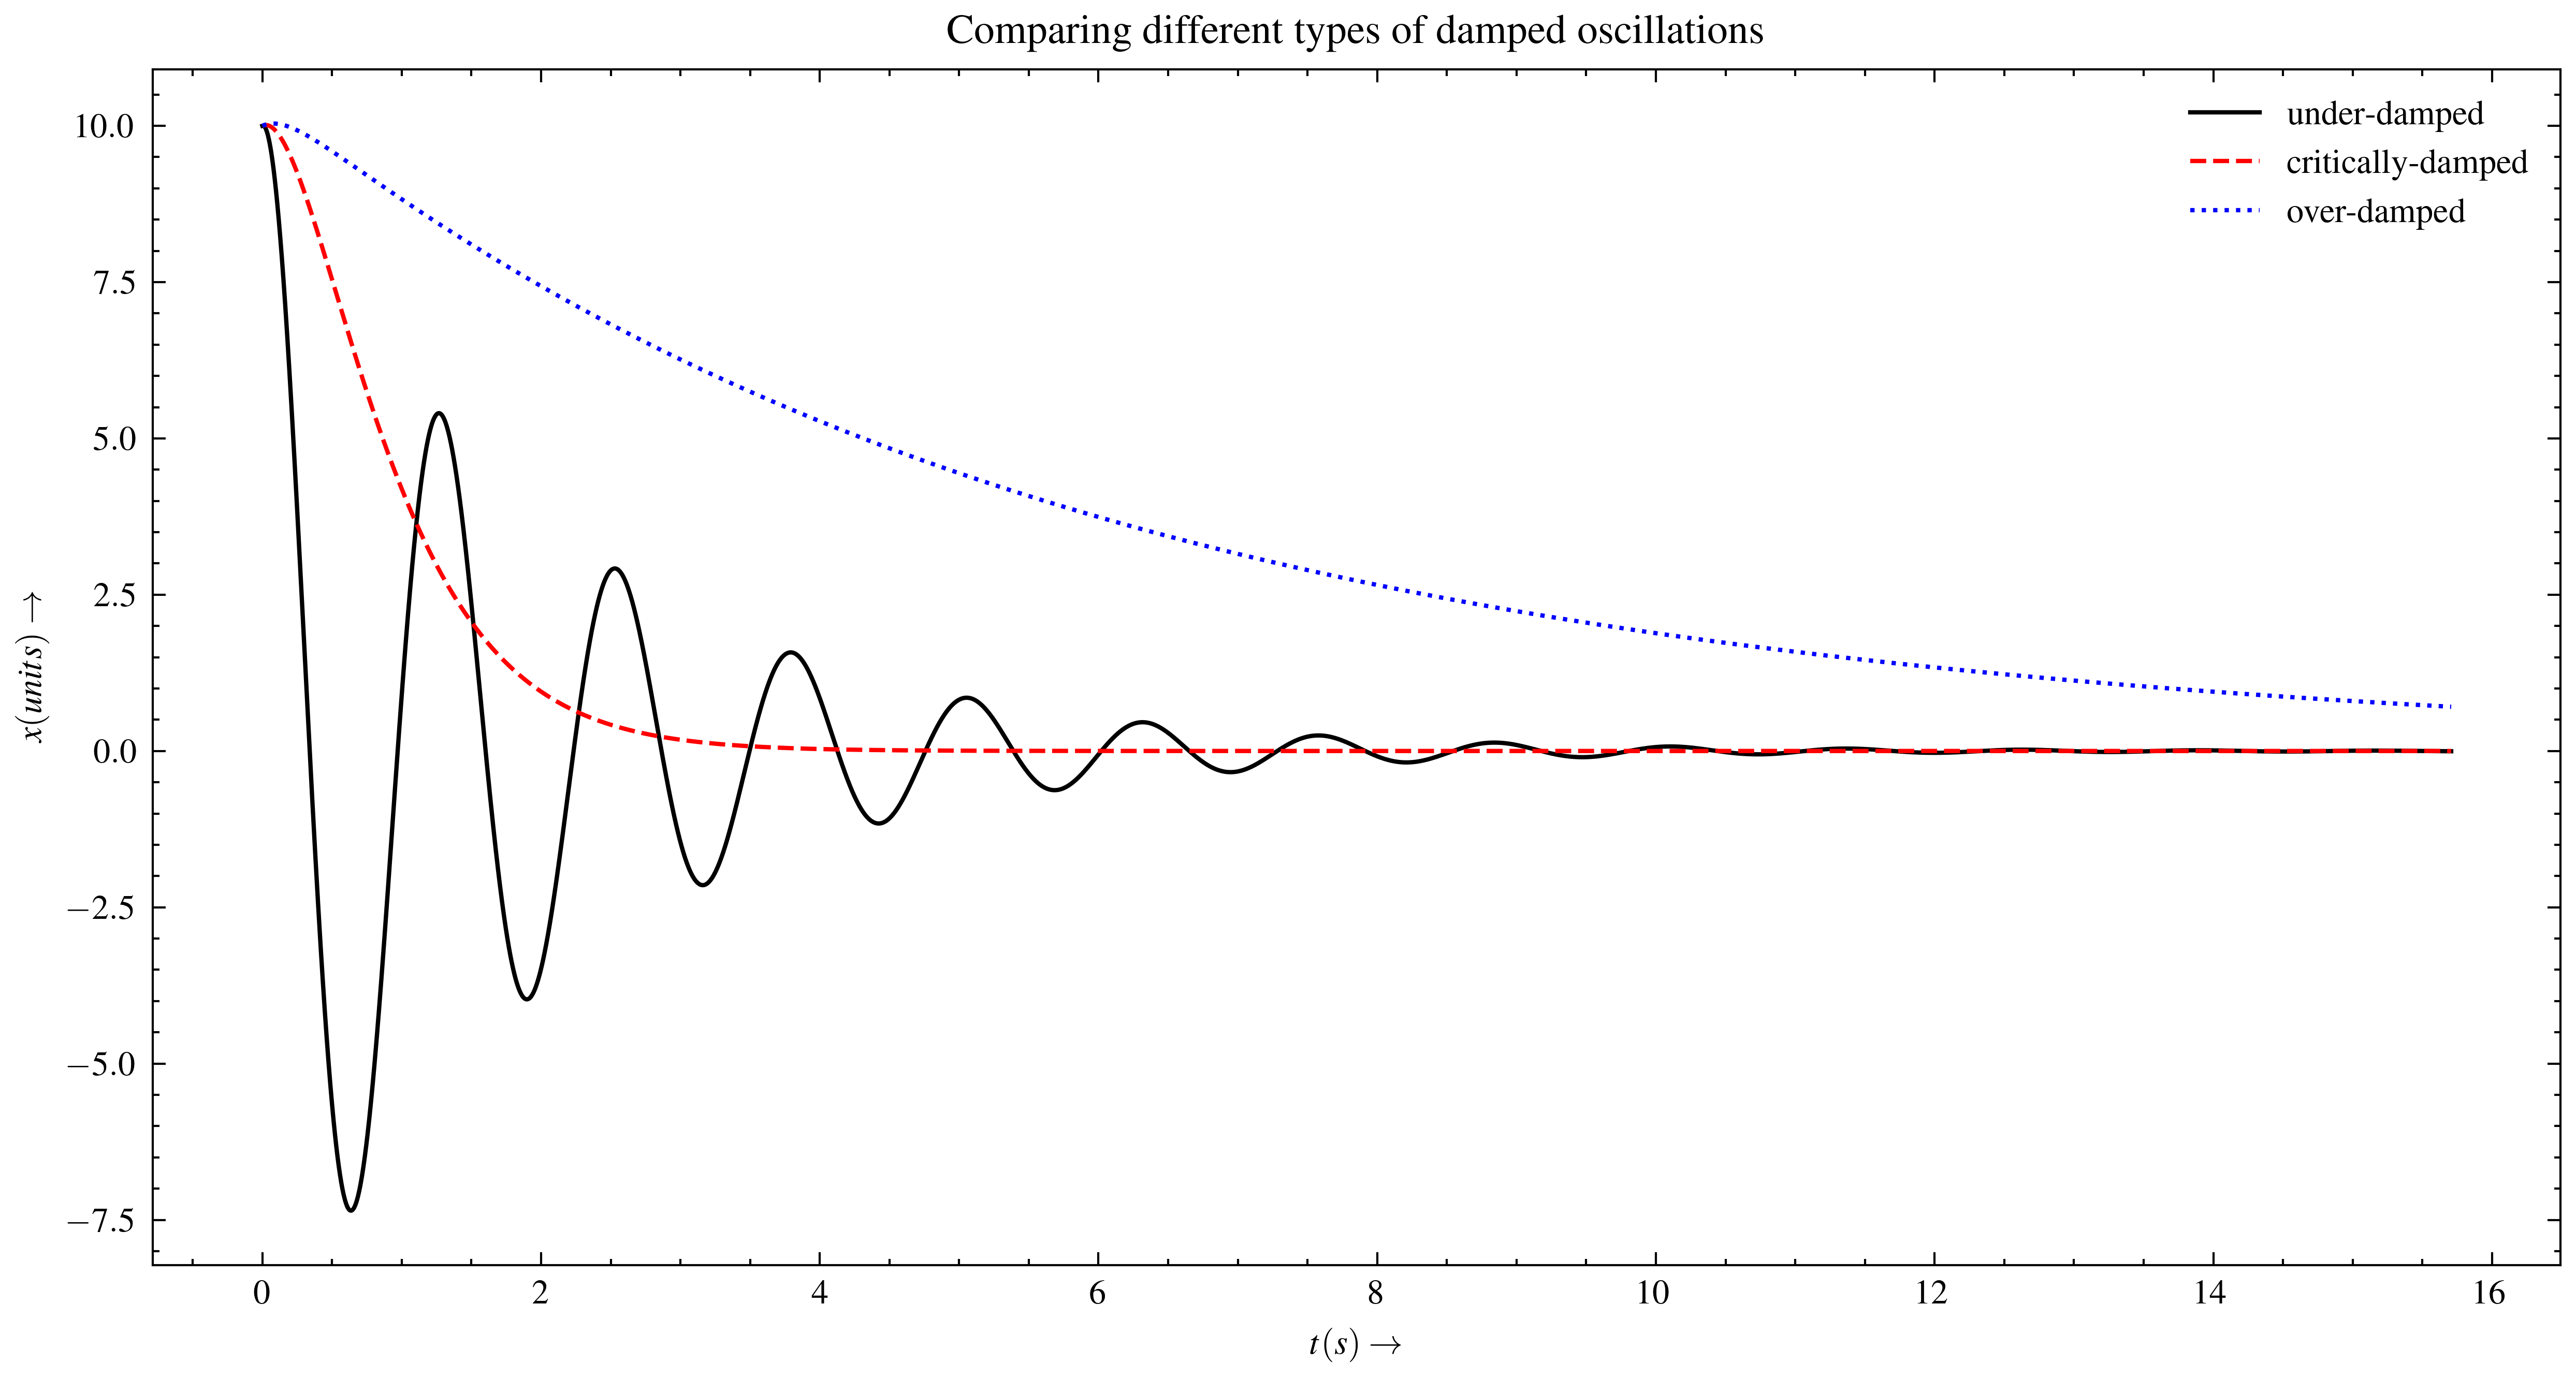

In [19]:
plt.plot(points, y_under, label="under-damped")
plt.plot(points, y_critical, label="critically-damped")
plt.plot(points, y_over, label="over-damped")
plt.title("Comparing different types of damped oscillations")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.legend()
plt.show()


#### Forced harmonic oscillator

$$\;$$

For forced harmonic oscillator the quation of motion becomes,
$$\ddot x + \gamma \dot x + \omega^2 x = f_o sin(\alpha t)$$

where, $f_o$ is the apmlituted and $\alpha$ is the andgular frequency of the given force.


In [20]:
gamma = 3
omega = 1
f_0 = 5
alpha = 3


def y_prime_prime(t, x, x_prime):
    return - 2 * gamma * x_prime - omega**2 * x + f_0 * sin(alpha * t)


x_i = 0
x_f = 10 * pi
y_i = 1
y_prime_i = 0
h = 0.001


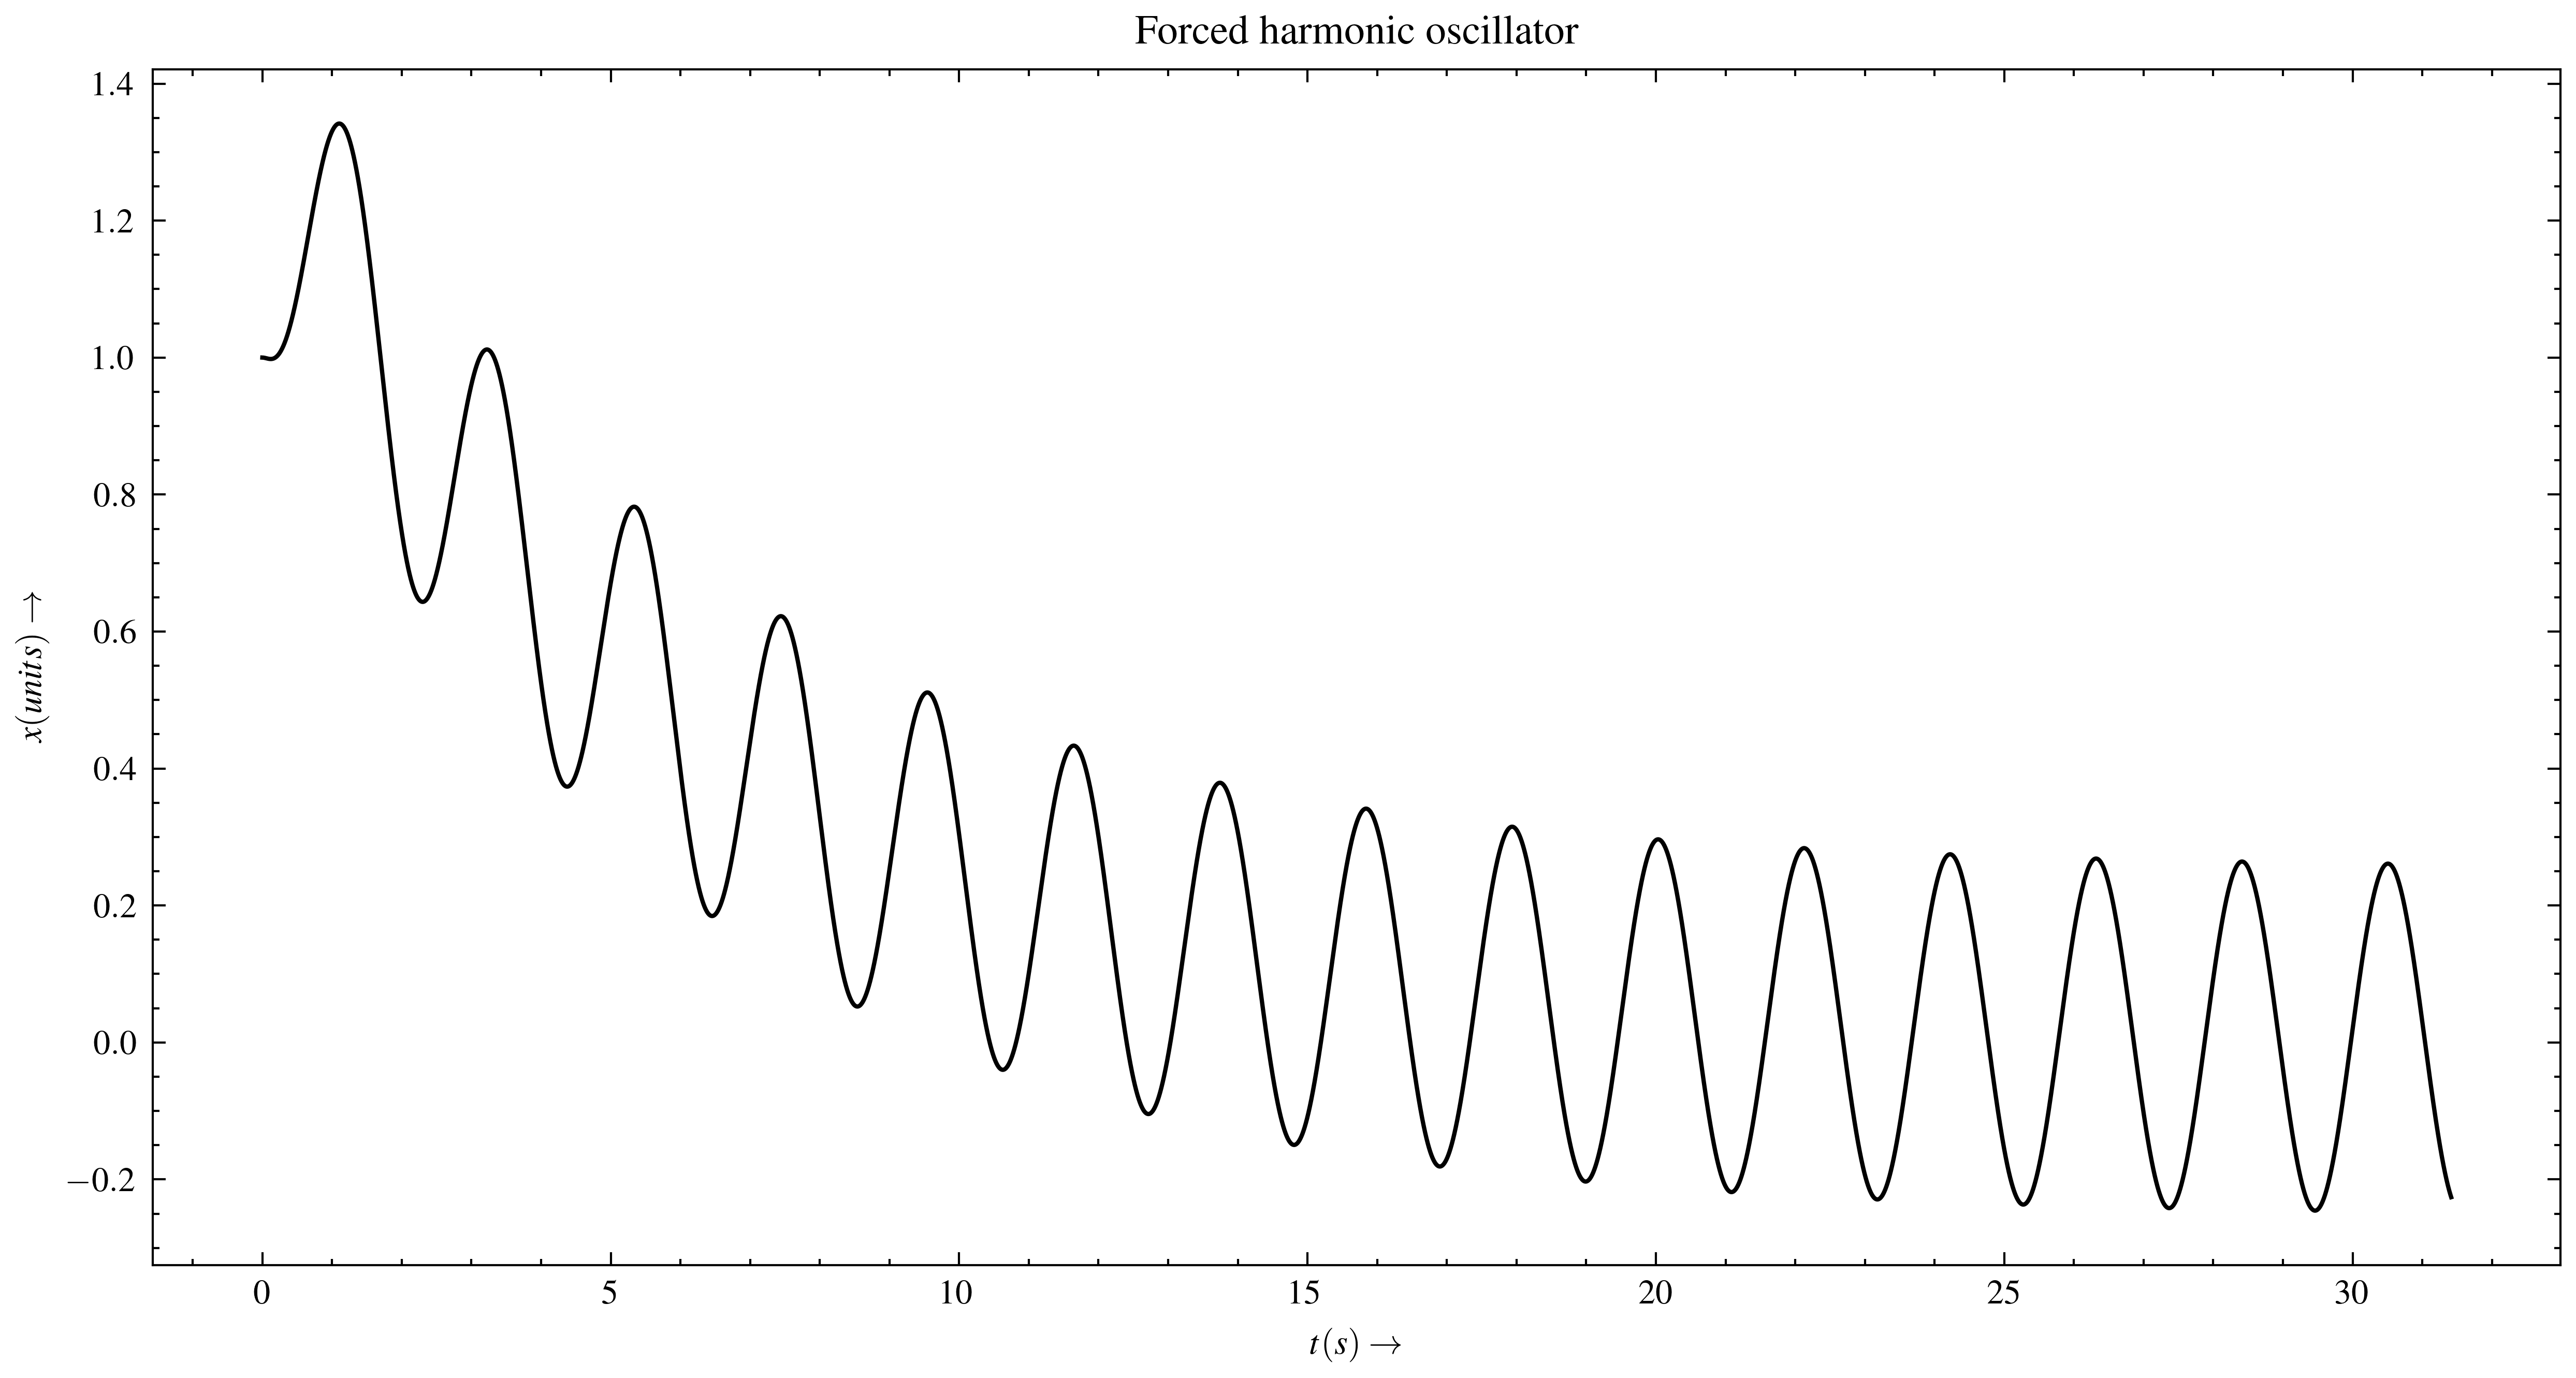

In [21]:
points, y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

plt.plot(points, y_euler)
plt.title("Forced harmonic oscillator")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.show()


#### Undamped forced resonating oscillator

For forced harmonic oscillator the quation of motion becomes,
$$\ddot x + \omega^2 x = f_o sin(\alpha x)$$


In [22]:
gamma = 0
omega = 2
f_0 = 2
alpha = 2


def y_prime_prime(t, x, x_prime):
    return - 2 * gamma * x_prime - omega**2 * x + f_0 * sin(alpha * t)


x_i = 0
x_f = 10 * pi
y_i = 0
y_prime_i = 0
h = 0.001


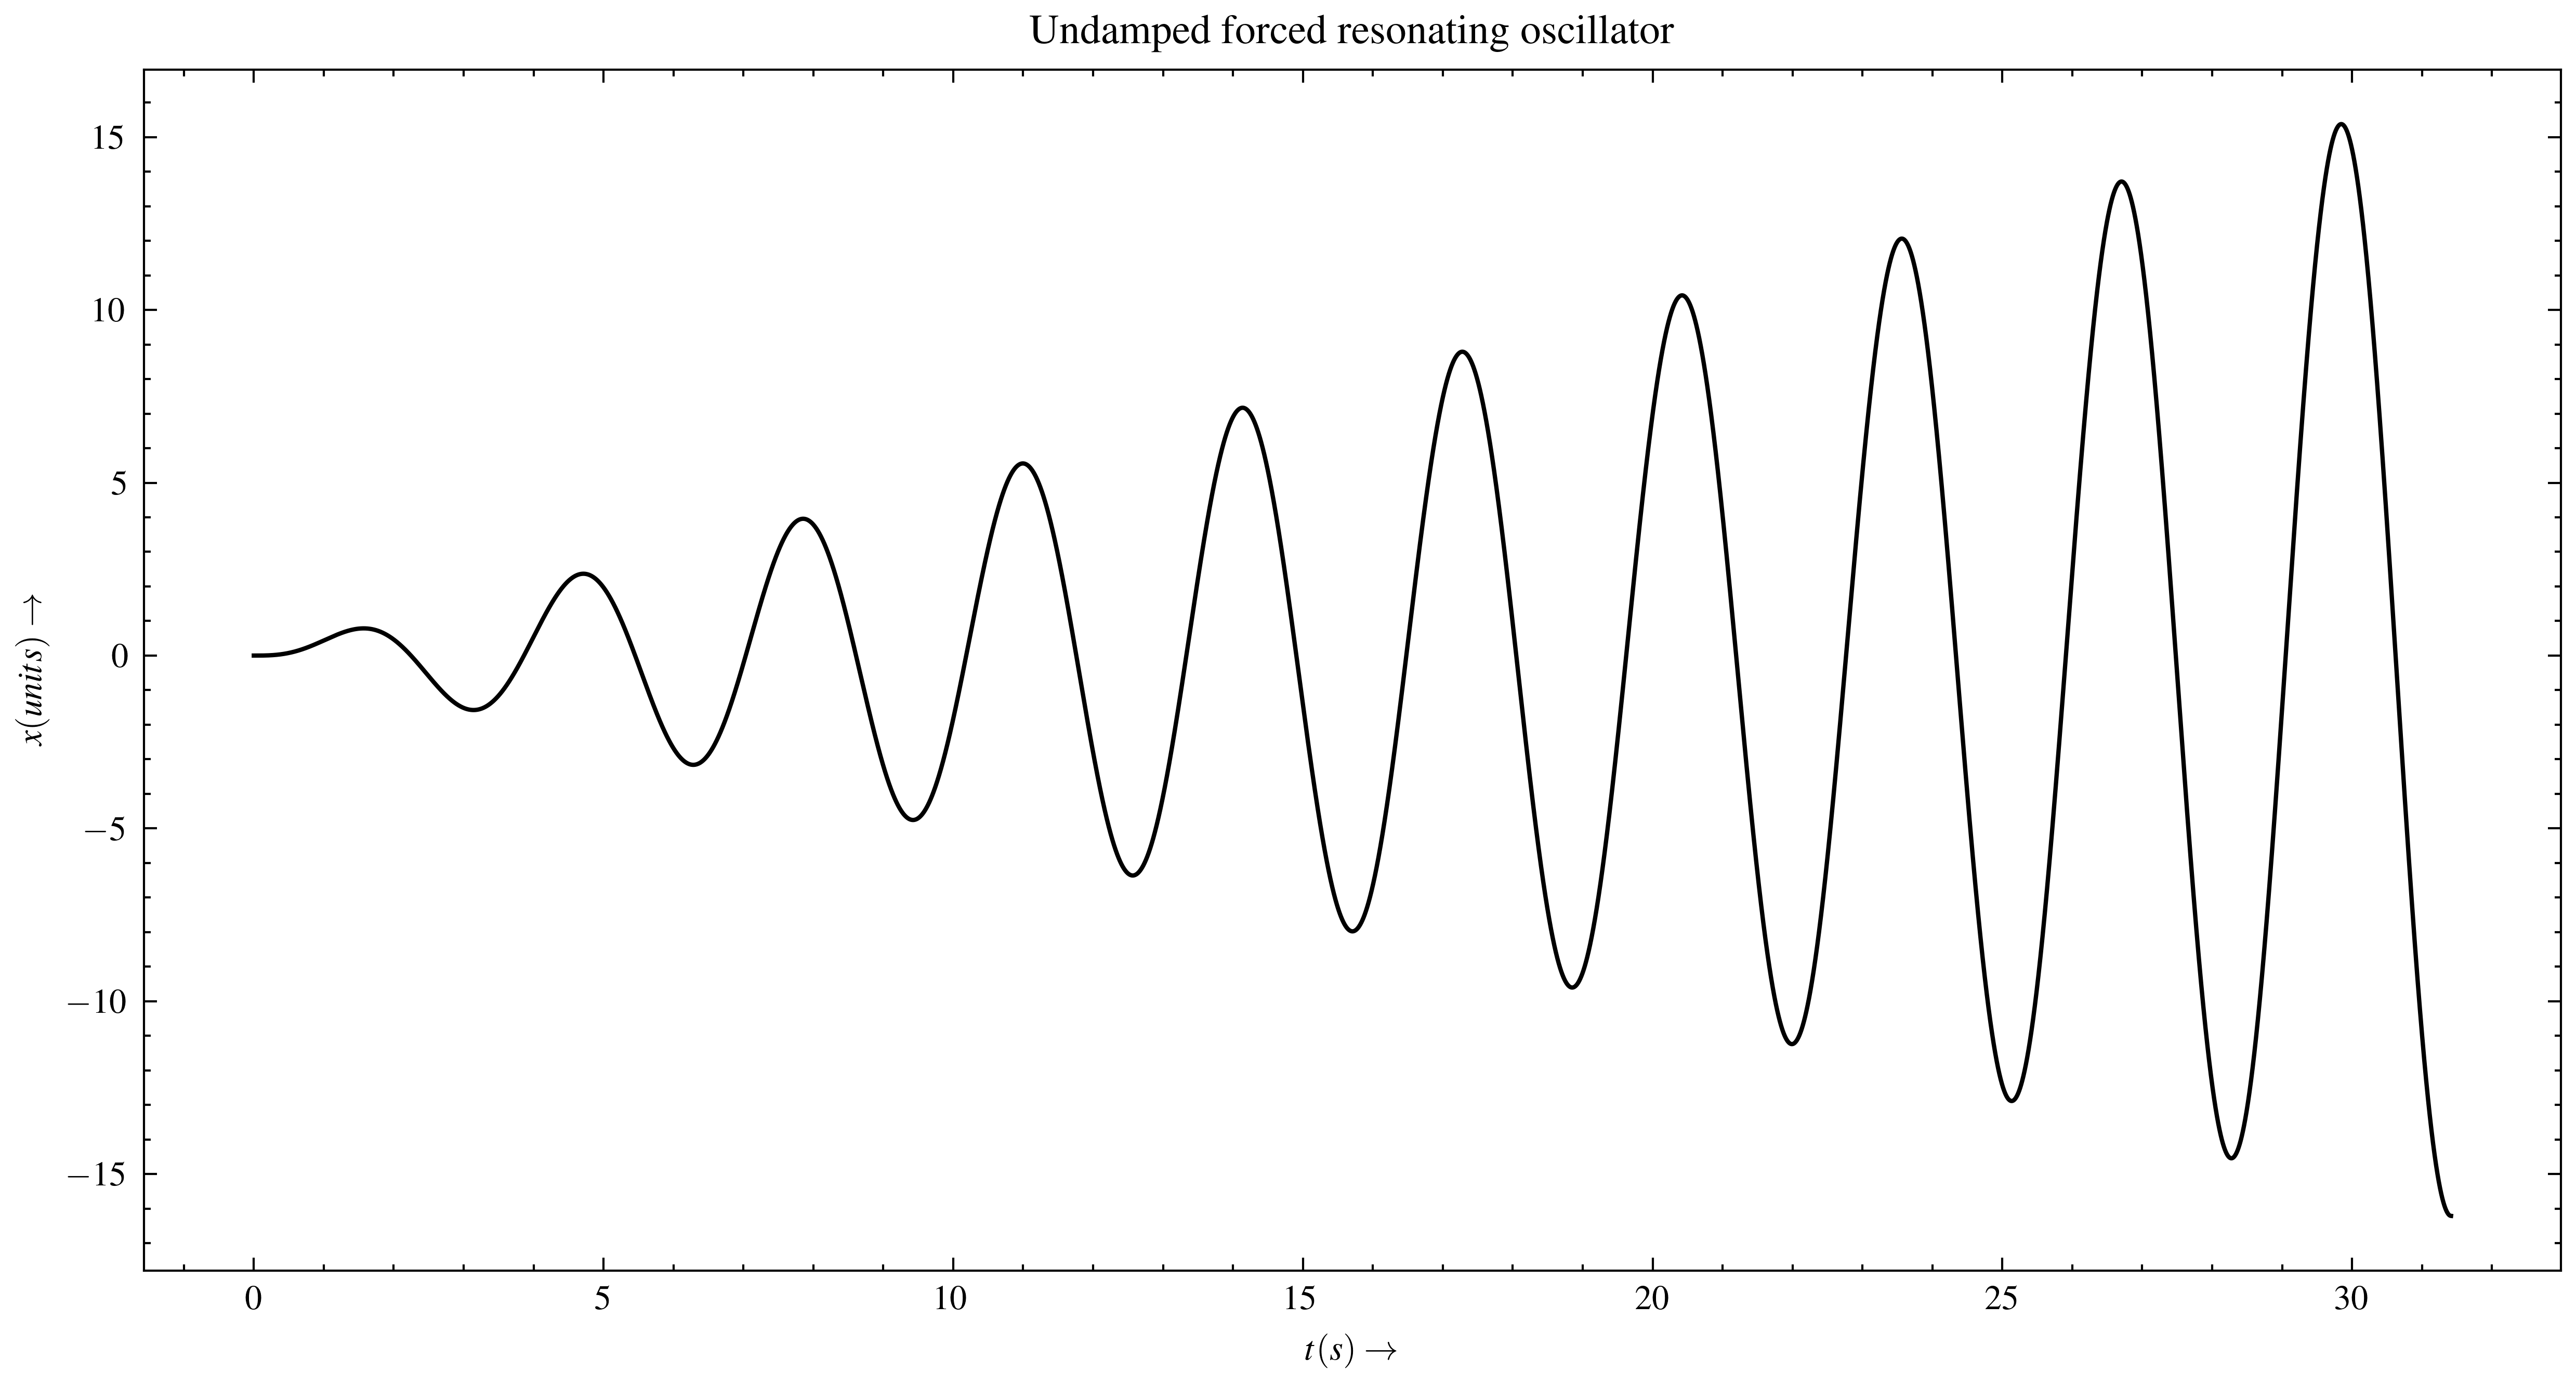

In [23]:
points, y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)

plt.plot(points, y_euler)
plt.title("Undamped forced resonating oscillator")
plt.xlabel("$t (s) \\rightarrow$")
plt.ylabel("$x (units) \\rightarrow$")
plt.show()


### Projectile Motion

A projectile motion is characterised by,
$$\frac{d^2x}{dt^2} = 0$$
$$\frac{d^2y}{dt^2} = -g$$

where, $g$ is acceleration due to gravity.


In [24]:
def x_prime_prime(t, x, x_prime):
    return 0.0


def y_prime_prime(t, y, y_prime):
    return - g


u = 100
thetas = [45, 15, 30, 60]
x_i, y_i = (0, 0)

t_i = 0
t_f = 20
h = 0.001


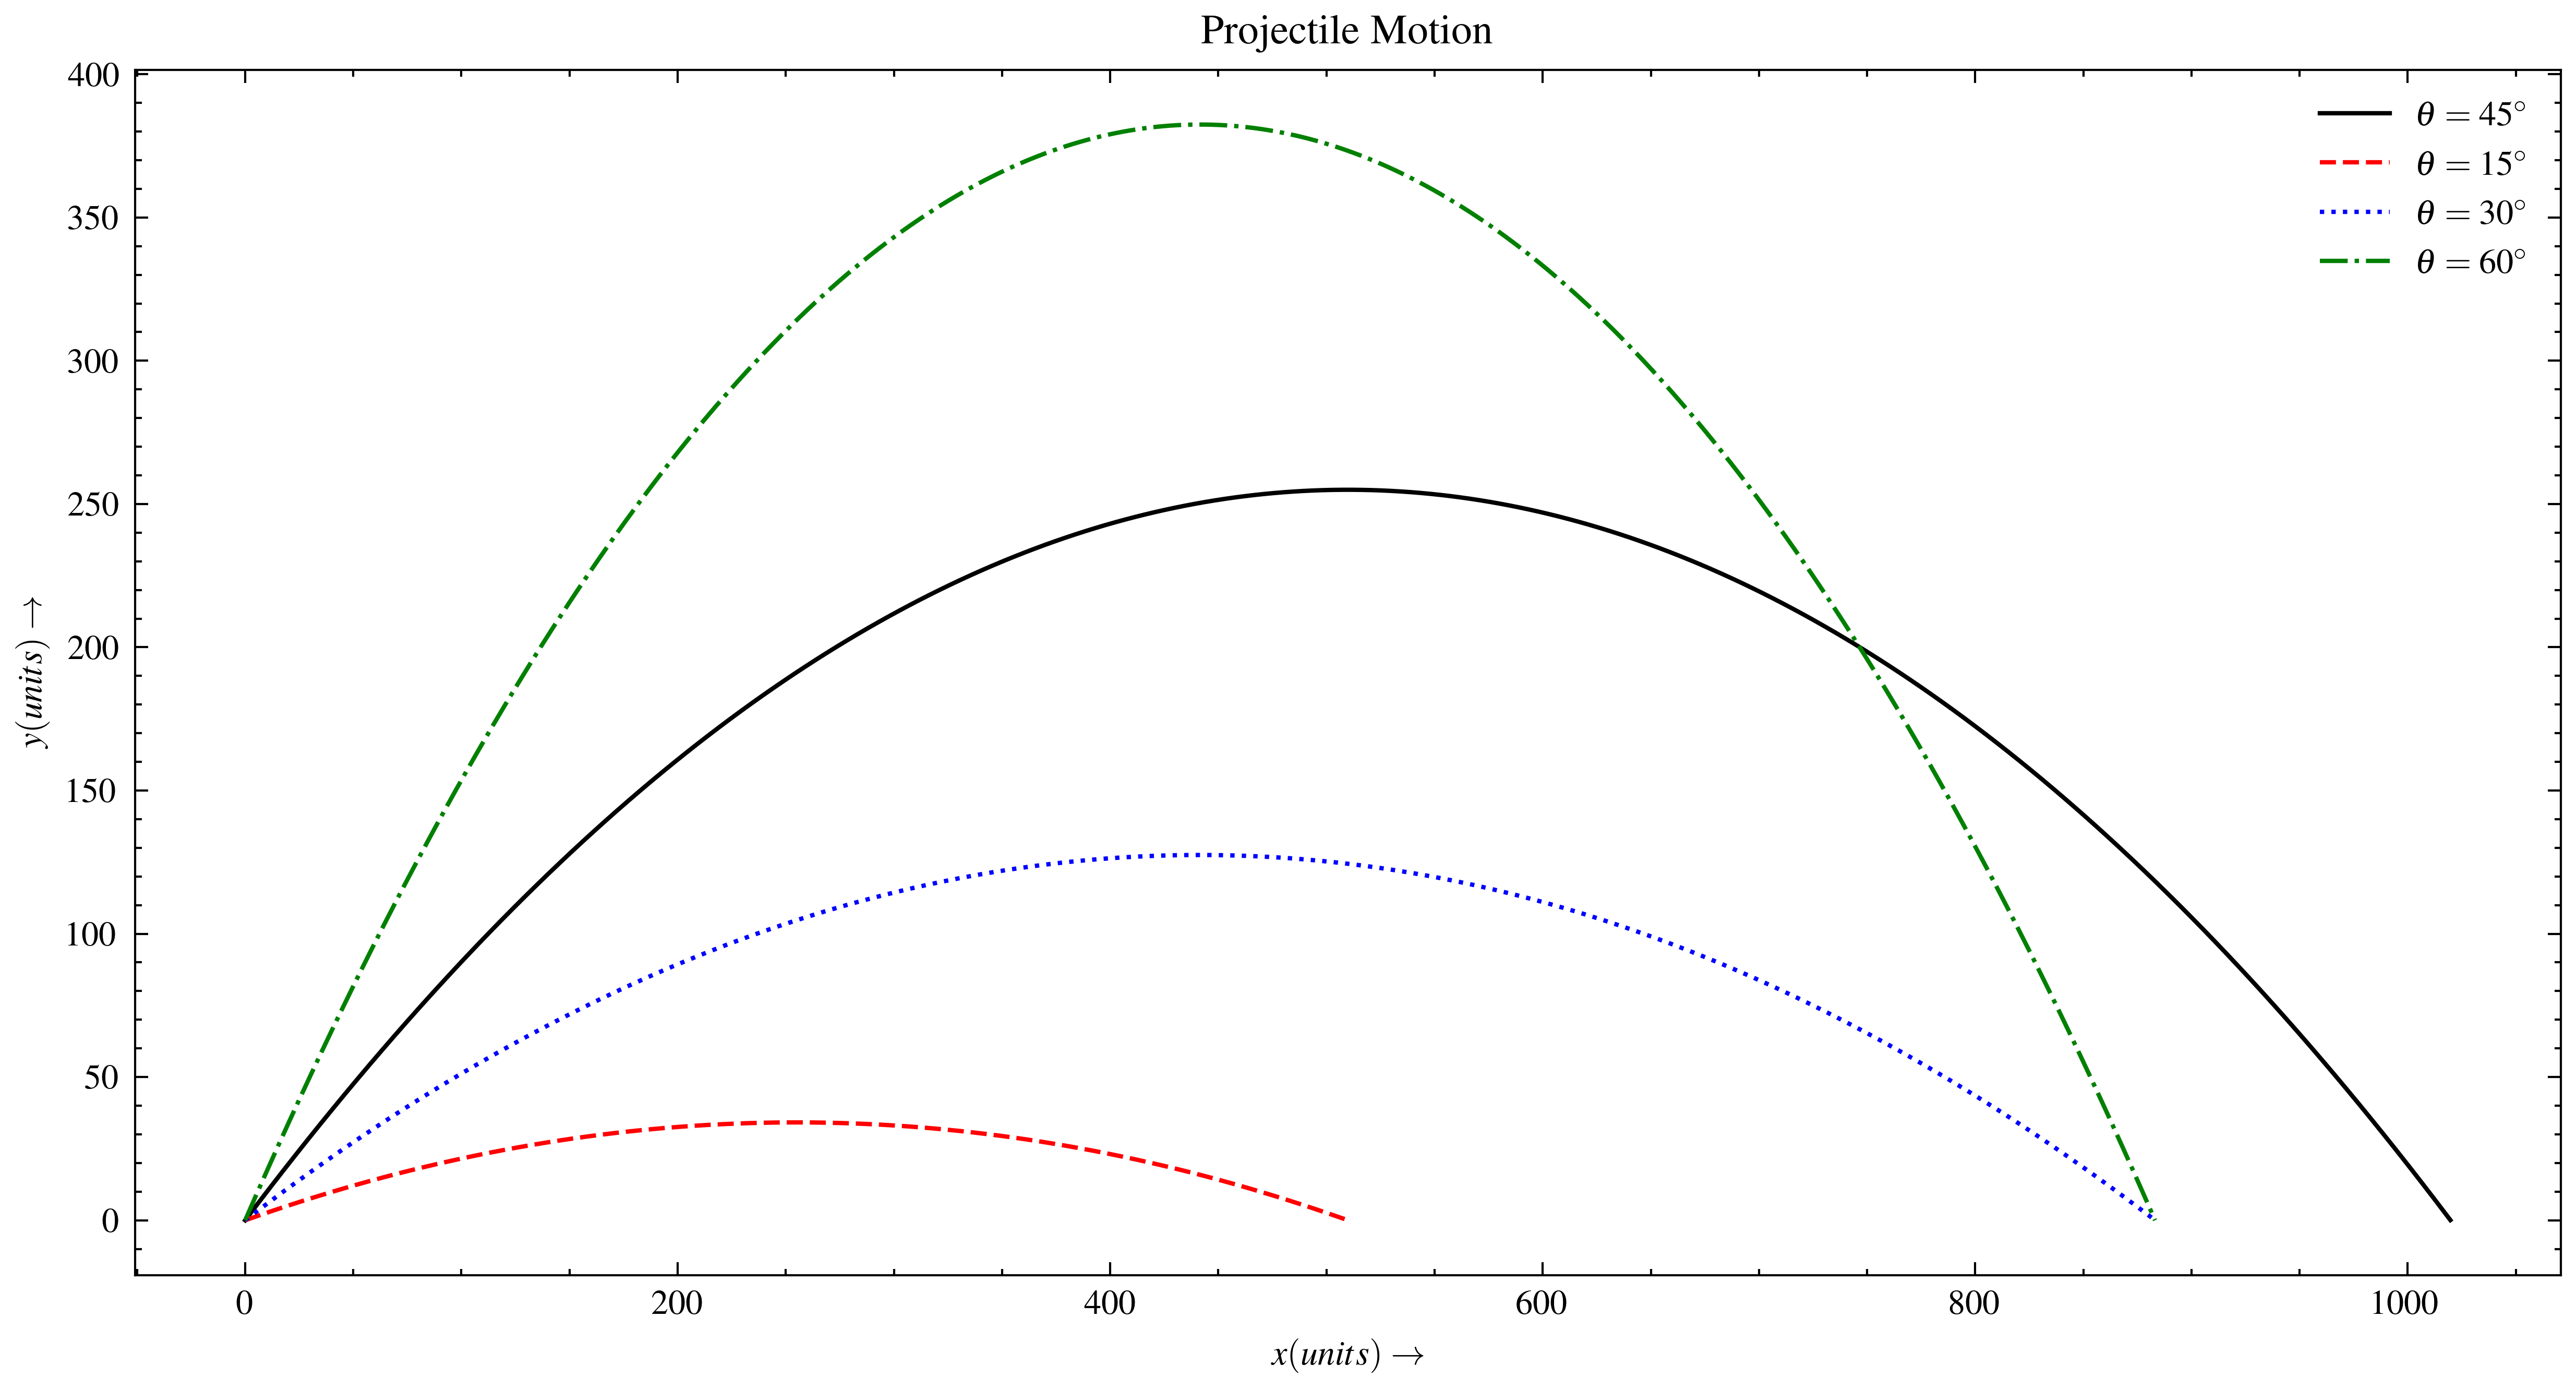

In [25]:
for theta in thetas:

    x_prime_i = u * cos(deg2rad(theta))
    y_prime_i = u * sin(deg2rad(theta))

    points, x = solve_euler(x_prime_prime, t_i, t_f, x_i, x_prime_i, h)

    points, y = solve_euler(y_prime_prime, t_i, t_f, y_i, y_prime_i, h)
    y[y < 0] = None

    plt.plot(x, y, label=f"$\\theta = {theta}^\\circ$")

plt.title("Projectile Motion")
plt.xlabel("$x (units) \\rightarrow$")
plt.ylabel("$y (units) \\rightarrow$")
plt.legend()
plt.show()
